In [ ]:
!gdown 1Lo9OZ16OChX3tQEHXvNaIrRds3UuuB8G

Downloading...
From: https://drive.google.com/uc?id=1Lo9OZ16OChX3tQEHXvNaIrRds3UuuB8G
To: /content/NFL_Grouped_Stats_Dataset_for_Model.csv
100% 163k/163k [00:00<00:00, 56.2MB/s]


In [ ]:
#Looking at the data
import pandas as pd
df = pd.read_csv('NFL_Grouped_Stats_Dataset_for_Model.csv')
df.head()

Unnamed: 0      GameId OffenseTeam  Score  PassingYards  RunningYards  \
0           1  2014090400         SEA     34           191           210   
1           0  2014090400          GB     18           210            80   
2           2  2014090700         ATL     37           448           123   
3           3  2014090700          NO     34           333           139   
4           5  2014090701         CIN     23           301            81   

   PenaltyYards  Penalties  Turnovers Win_Lose  
0            55          7          1      Win  
1            79          5          2     Lose  
2            47          6          1      Win  
3            76          7          2     Lose  
4            34          4          0      Win

In [ ]:
df.loc[:, 'PassingYards':'Turnovers']

PassingYards  RunningYards  PenaltyYards  Penalties  Turnovers
0              191           210            55          7          1
1              210            80            79          5          2
2              448           123            47          6          1
3              333           139            76          7          2
4              301            81            34          4          0
...            ...           ...           ...        ...        ...
3807           333            39            55          5          3
3808           328            94            47          8          2
3809           149            70            87          9          1
3810           205           113            94         10          1
3811           291            99            51          8          2

[3812 rows x 5 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
le = LabelEncoder()
df.Win_Lose = le.fit_transform(df.Win_Lose)
df

Unnamed: 0      GameId OffenseTeam  Score  PassingYards  RunningYards  \
0              1  2014090400         SEA     34           191           210   
1              0  2014090400          GB     18           210            80   
2              2  2014090700         ATL     37           448           123   
3              3  2014090700          NO     34           333           139   
4              5  2014090701         CIN     23           301            81   
...          ...         ...         ...    ...           ...           ...   
3807        3807  2021110710          SF     17           333            39   
3808        3808  2021110711          LA     28           328            94   
3809        3809  2021110711         TEN     22           149            70   
3810        3811  2021110800         PIT     29           205           113   
3811        3810  2021110800         CHI     27           291            99   

      PenaltyYards  Penalties  Turnovers  Win_Lose  
0               55          7          1         1  
1               79          5          2         0  
2               47          6          1         1  
3               76          7          2         0  
4               34          4          0         1  
...            ...        ...        ...       ...  
3807            55          5          3         0  
3808            47          8          2         1  
3809            87          9          1         0  
3810            94         10          1         1  
3811            51          8          2         0  

[3812 rows x 10 columns]

In [ ]:
df.columns[4:-1]

Index(['PassingYards', 'RunningYards', 'PenaltyYards', 'Penalties',
       'Turnovers'],
      dtype='object')

In [ ]:
#We have 5 features to work with, preparing data and labels
X = StandardScaler().fit_transform(df.loc[:,'PassingYards':'Turnovers'].values)
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

In [ ]:
print(y_test.unique())

[0 1]


Naive Bayes  
https://www.datacamp.com/tutorial/naive-bayes-scikit-learn  
https://medium.com/hugo-ferreiras-blog/confusion-matrix-and-other-metrics-in-machine-learning-894688cb1c0a

In [ ]:
#importing libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline
def Naive_bayes(X, y, test_x, test_y):
  """
  Description: This method performs training and prints the results of Naive Bayes
  Input: 
    X: the training dataset,
    y: the training labels,
    test_x: test dataset,
    test_y: test labels
  Returns:
  predictions: list or array of output predictions
  """
  #training
  gaussian = GaussianNB()
  gaussian.fit(X,y)
  #prediction
  predictions= gaussian.predict(test_x)
  print("Accuracy:", metrics.accuracy_score(test_y, predictions))
  print(confusion_matrix(test_y, predictions))
  print(classification_report(test_y, predictions))
  value=1
  width=1
  if (test_x.shape[1]>4):
    fig = plot_decision_regions(test_x, test_y.values, clf = gaussian, legend = 2,
                        filler_feature_values={2: value, 3:value, 4:value},
                        filler_feature_ranges={2: width, 3: width, 4:width})#if using df change test_x to test_x.values
    plt.title("Decision boundary using Naive Bayes (Test)")
    plt.xlabel("feature0")
    plt.ylabel("feature1")
    plt.show()
  elif (test_x.shape[1]>3):
    fig = plot_decision_regions(test_x, test_y.values, clf = gaussian, legend = 2,
                        filler_feature_values={2: value, 3:value},
                        filler_feature_ranges={2: width, 3: width})#if using df change test_x to test_x.values
    plt.title("Decision boundary using Naive Bayes (Test)")
    plt.xlabel("feature0")
    plt.ylabel("feature1")
    plt.show()
  elif(test_x.shape[1]>2):
    fig = plot_decision_regions(test_x, test_y.values, clf = gaussian, legend = 2,
                        filler_feature_values={2: value},
                        filler_feature_ranges={2: width})#if using df change test_x to test_x.values
    plt.title("Decision boundary using Naive Bayes (Test)")
    plt.xlabel("feature0")
    plt.ylabel("feature1")
    plt.show()
  else:
    fig = plot_decision_regions(test_x, test_y.values, clf = gaussian, legend = 2)#if using df change test_x to test_x.values
    plt.title("Decision boundary using Naive Bayes (Test)")
    plt.xlabel("feature0")
    plt.ylabel("feature1")
    plt.show()
  return predictions


Decision Trees  
https://datagy.io/sklearn-decision-tree-classifier/

In [ ]:
#importing libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import tree

def Decision_tree(X, y, test_x, test_y, names):
  """
  Description: This method performs training and prints the results of Decision Tree
  Input: 
    X: the training dataset,
    y: the training labels,
    test_x: test dataset,
    test_y: test labels
  Returns:
  predictions: list or array of output predictions
  """
  #training
  dt = DecisionTreeClassifier( criterion='gini',
                              splitter='best',
                              max_depth=4, #set None for full tree
                              min_samples_split=2,
                              min_samples_leaf=1,
                              min_weight_fraction_leaf=0.0,
                              max_features=None,
                              random_state=None,
                              max_leaf_nodes=None,
                              min_impurity_decrease=0.0,
                              class_weight=None,
                              ccp_alpha=0.0)
  dt.fit(X,y)
  #prediction
  predictions = dt.predict(test_x)
  print("Accuracy:",metrics.accuracy_score(test_y, predictions))
  print(confusion_matrix(test_y, predictions))
  print(classification_report(test_y, predictions))
  fig = plt.figure(figsize=(25,20))
  _ = tree.plot_tree(dt, 
                   feature_names= names,  #columns if you us df
                   class_names=['lose','win'],
                   filled=True,
                   fontsize=10)
  return predictions


Accuracy: 0.6998689384010485
[[275 101]
 [128 259]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       376
           1       0.72      0.67      0.69       387

    accuracy                           0.70       763
   macro avg       0.70      0.70      0.70       763
weighted avg       0.70      0.70      0.70       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


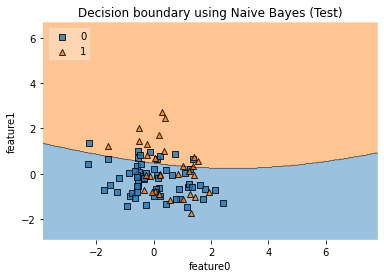

In [ ]:
#all 5 features
p1 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6893840104849279
[[258 118]
 [119 268]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       376
           1       0.69      0.69      0.69       387

    accuracy                           0.69       763
   macro avg       0.69      0.69      0.69       763
weighted avg       0.69      0.69      0.69       763



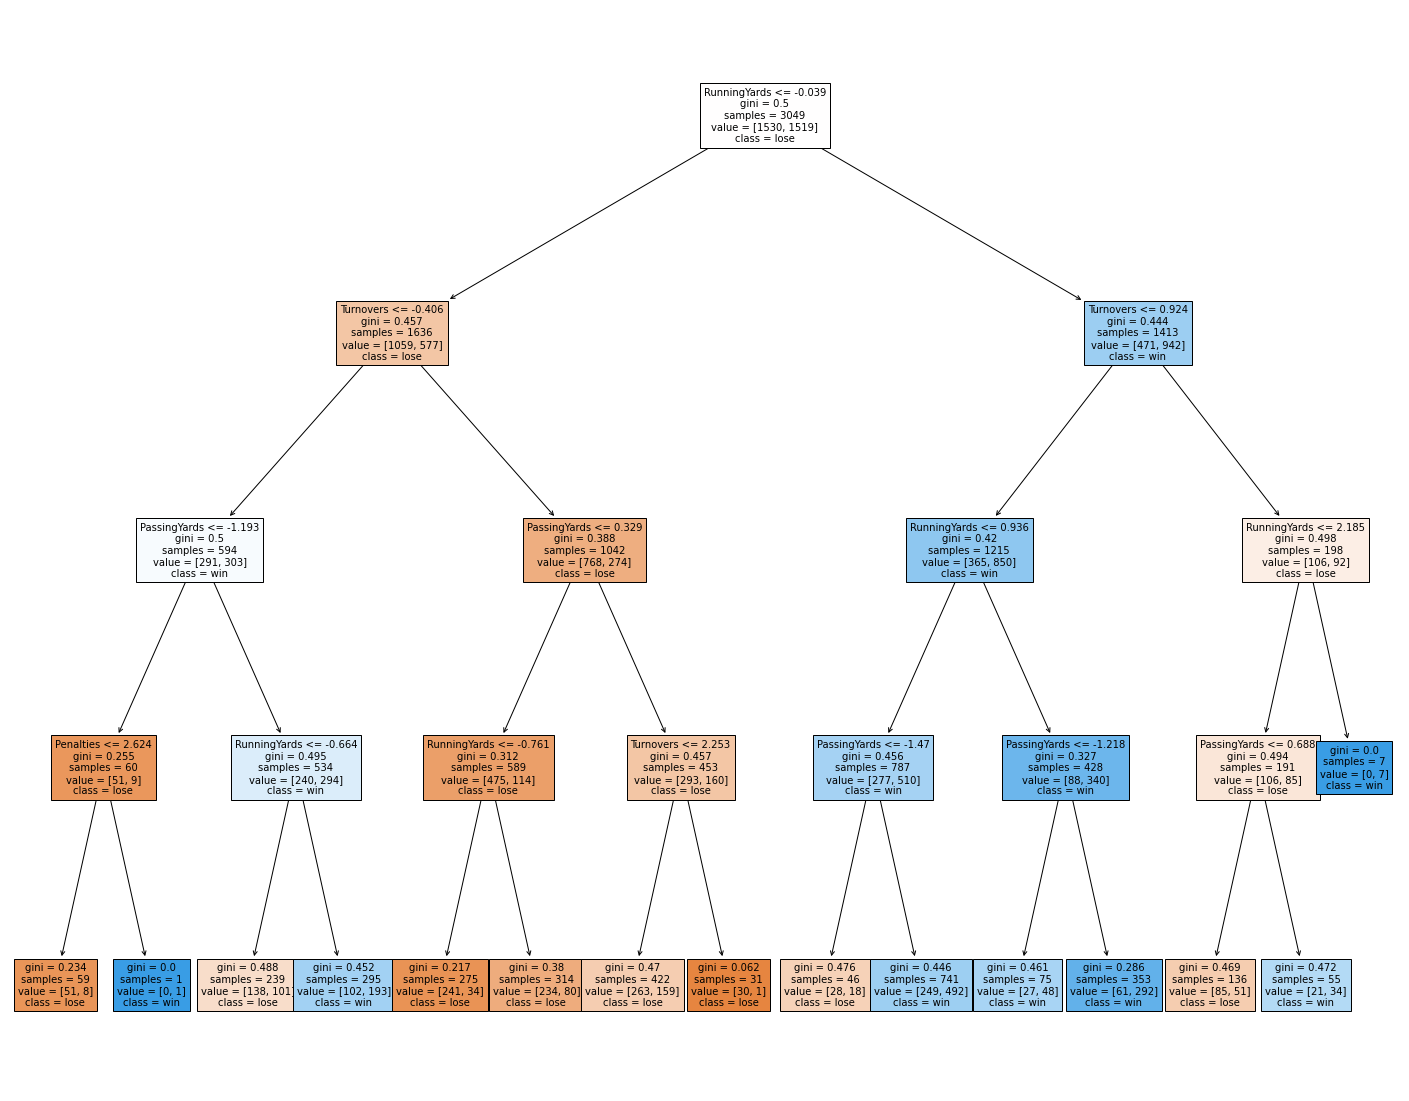

In [ ]:
d1 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[4:-1])

In [ ]:
#PassingYards and RunningYards
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','RunningYards']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6841415465268676
[[301  75]
 [166 221]]
              precision    recall  f1-score   support

           0       0.64      0.80      0.71       376
           1       0.75      0.57      0.65       387

    accuracy                           0.68       763
   macro avg       0.70      0.69      0.68       763
weighted avg       0.70      0.68      0.68       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


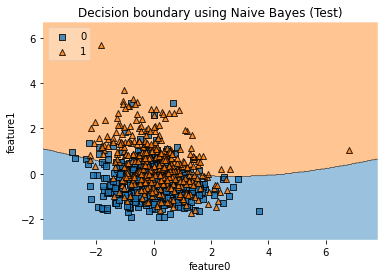

In [ ]:
p2 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6526867627785059
[[225 151]
 [114 273]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       376
           1       0.64      0.71      0.67       387

    accuracy                           0.65       763
   macro avg       0.65      0.65      0.65       763
weighted avg       0.65      0.65      0.65       763



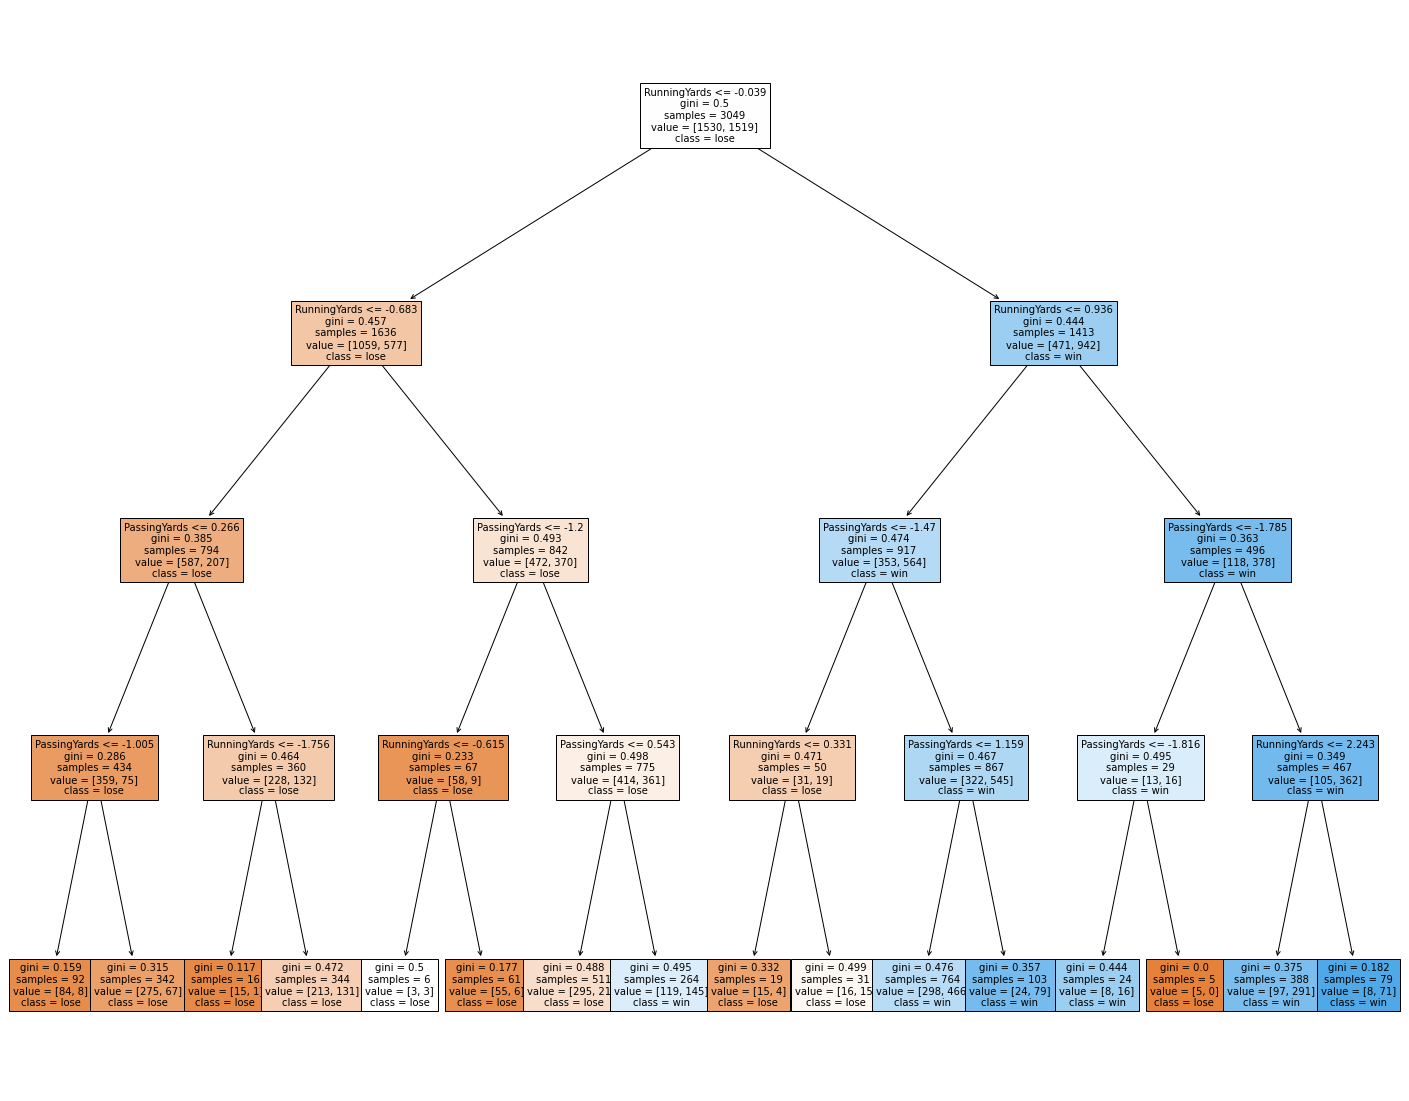

In [ ]:
d2 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,5]])

In [ ]:
#PassingYards and PenaltyYards
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','PenaltyYards']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.5294888597640891
[[204 172]
 [187 200]]
              precision    recall  f1-score   support

           0       0.52      0.54      0.53       376
           1       0.54      0.52      0.53       387

    accuracy                           0.53       763
   macro avg       0.53      0.53      0.53       763
weighted avg       0.53      0.53      0.53       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


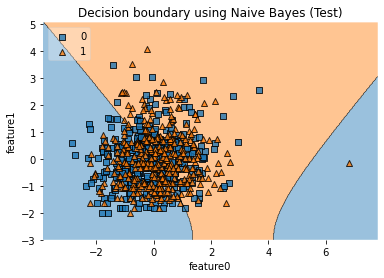

In [ ]:
p3 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.5137614678899083
[[230 146]
 [225 162]]
              precision    recall  f1-score   support

           0       0.51      0.61      0.55       376
           1       0.53      0.42      0.47       387

    accuracy                           0.51       763
   macro avg       0.52      0.52      0.51       763
weighted avg       0.52      0.51      0.51       763



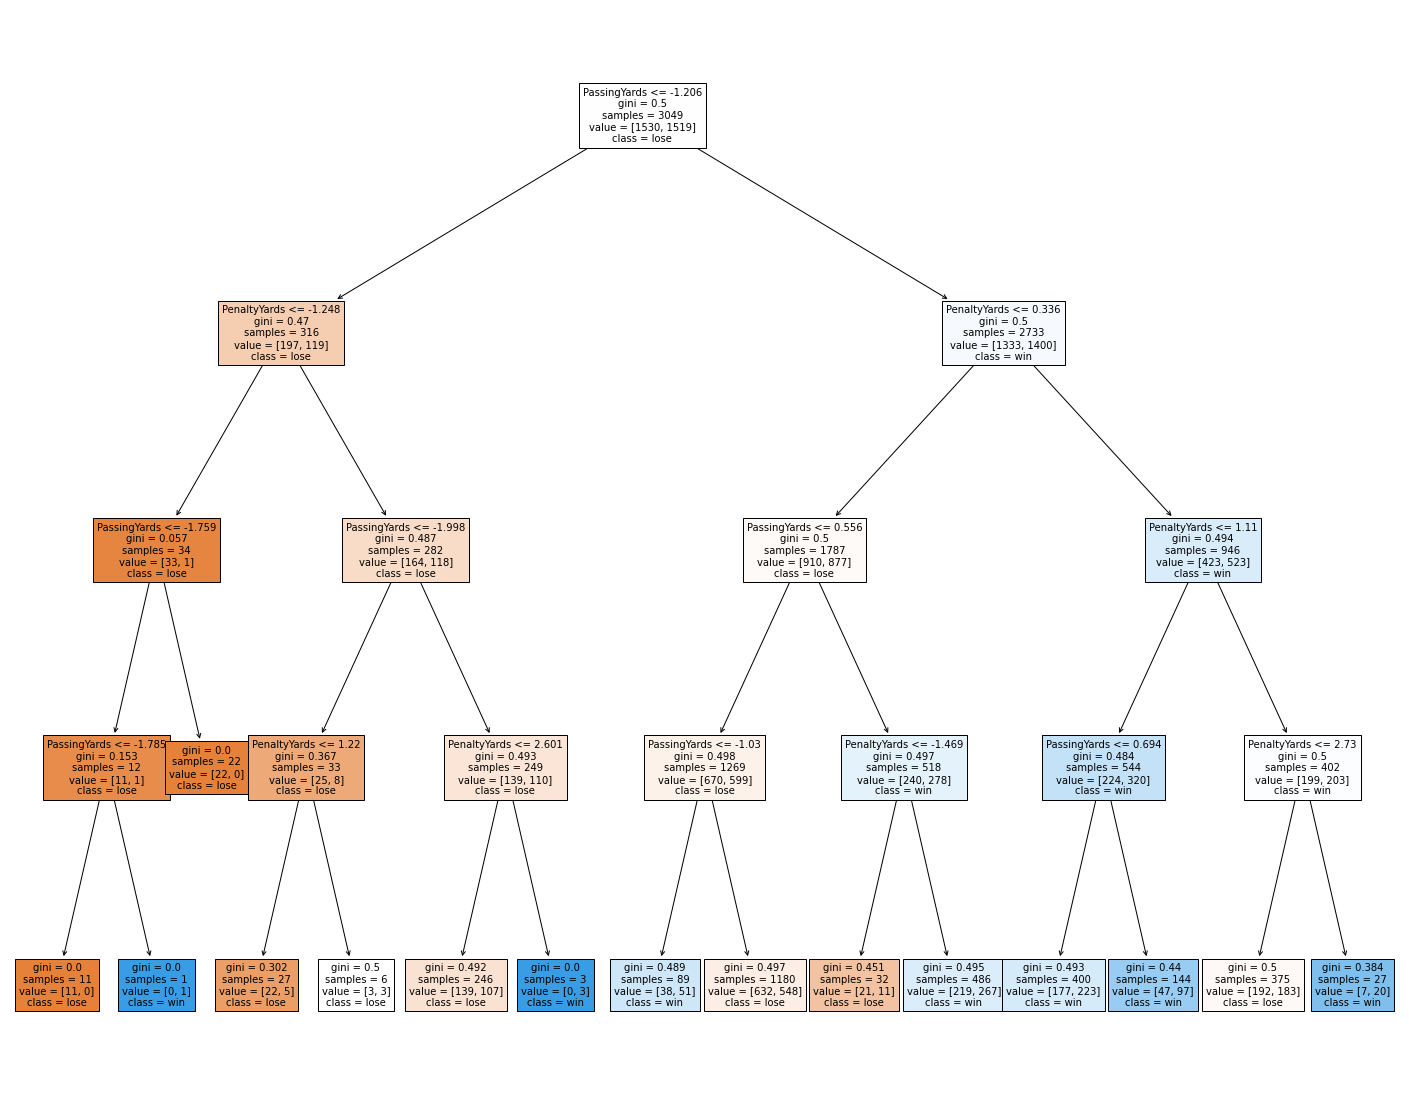

In [ ]:
d3 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,6]])

In [ ]:
#PassingYards and Penalties
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','Penalties']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.5307994757536042
[[209 167]
 [191 196]]
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       376
           1       0.54      0.51      0.52       387

    accuracy                           0.53       763
   macro avg       0.53      0.53      0.53       763
weighted avg       0.53      0.53      0.53       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


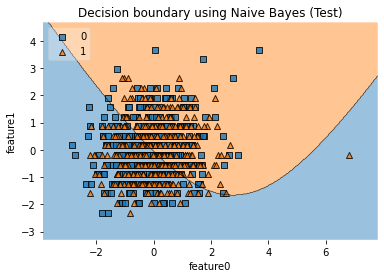

In [ ]:
p4 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.5111402359108781
[[234 142]
 [231 156]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.56       376
           1       0.52      0.40      0.46       387

    accuracy                           0.51       763
   macro avg       0.51      0.51      0.51       763
weighted avg       0.51      0.51      0.51       763



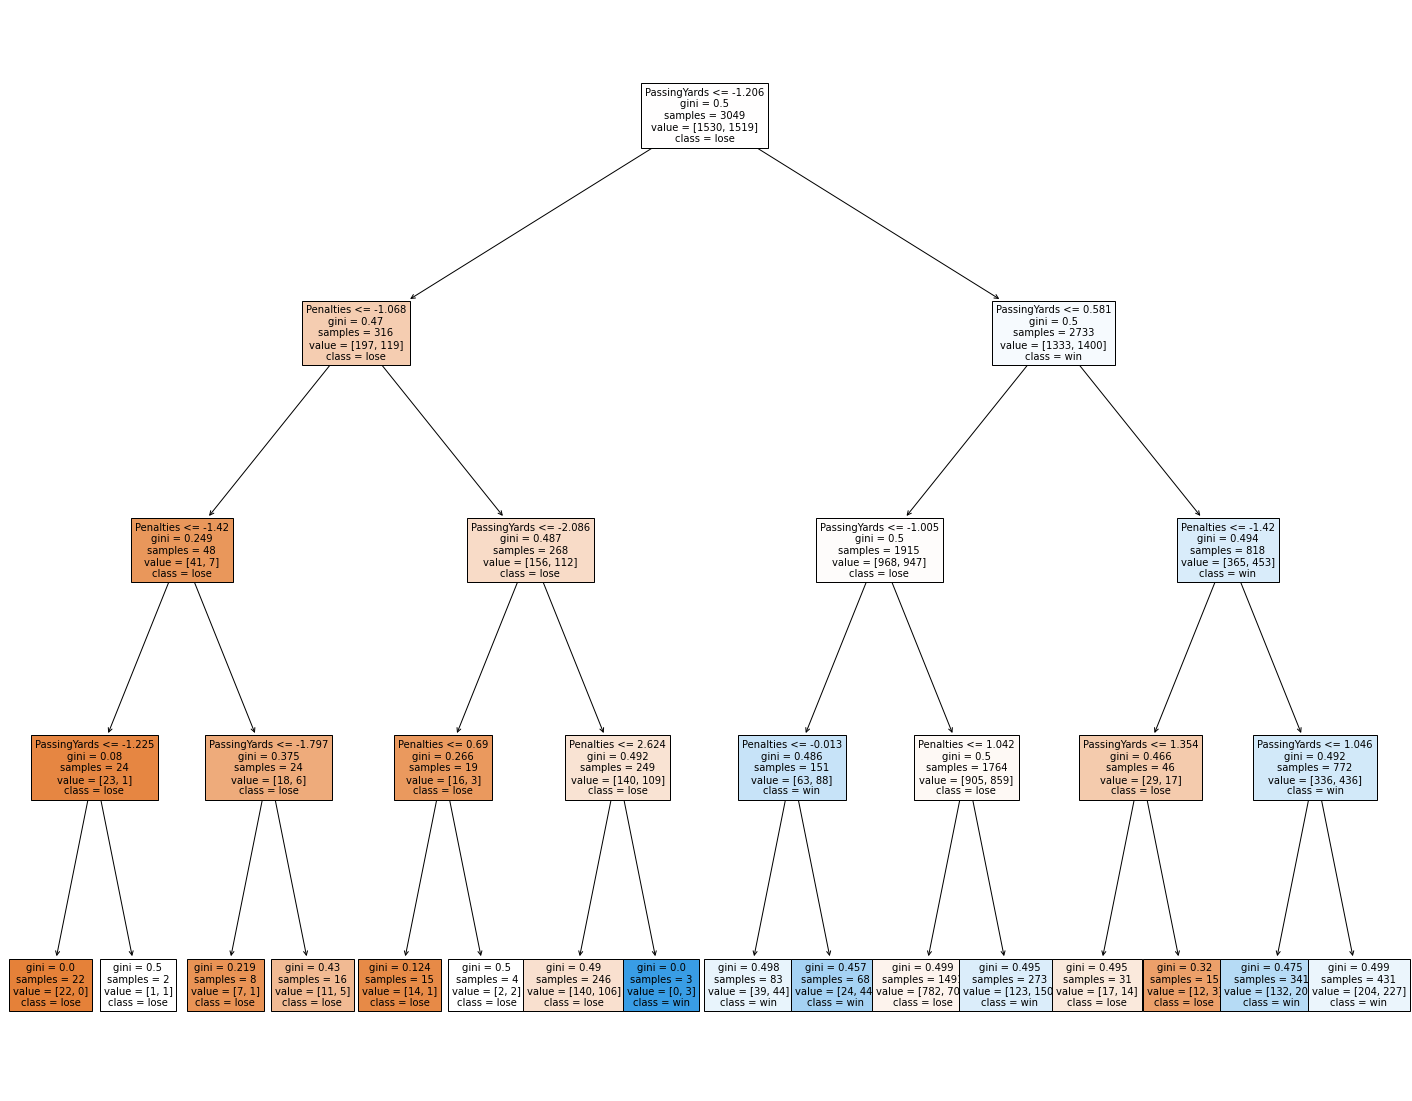

In [ ]:
d4 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,7]])

In [ ]:
#PassingYards and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6055045871559633
[[181 195]
 [106 281]]
              precision    recall  f1-score   support

           0       0.63      0.48      0.55       376
           1       0.59      0.73      0.65       387

    accuracy                           0.61       763
   macro avg       0.61      0.60      0.60       763
weighted avg       0.61      0.61      0.60       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


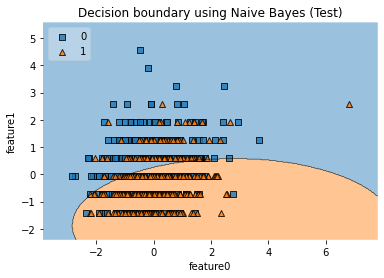

In [ ]:
p5 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6055045871559633
[[201 175]
 [126 261]]
              precision    recall  f1-score   support

           0       0.61      0.53      0.57       376
           1       0.60      0.67      0.63       387

    accuracy                           0.61       763
   macro avg       0.61      0.60      0.60       763
weighted avg       0.61      0.61      0.60       763



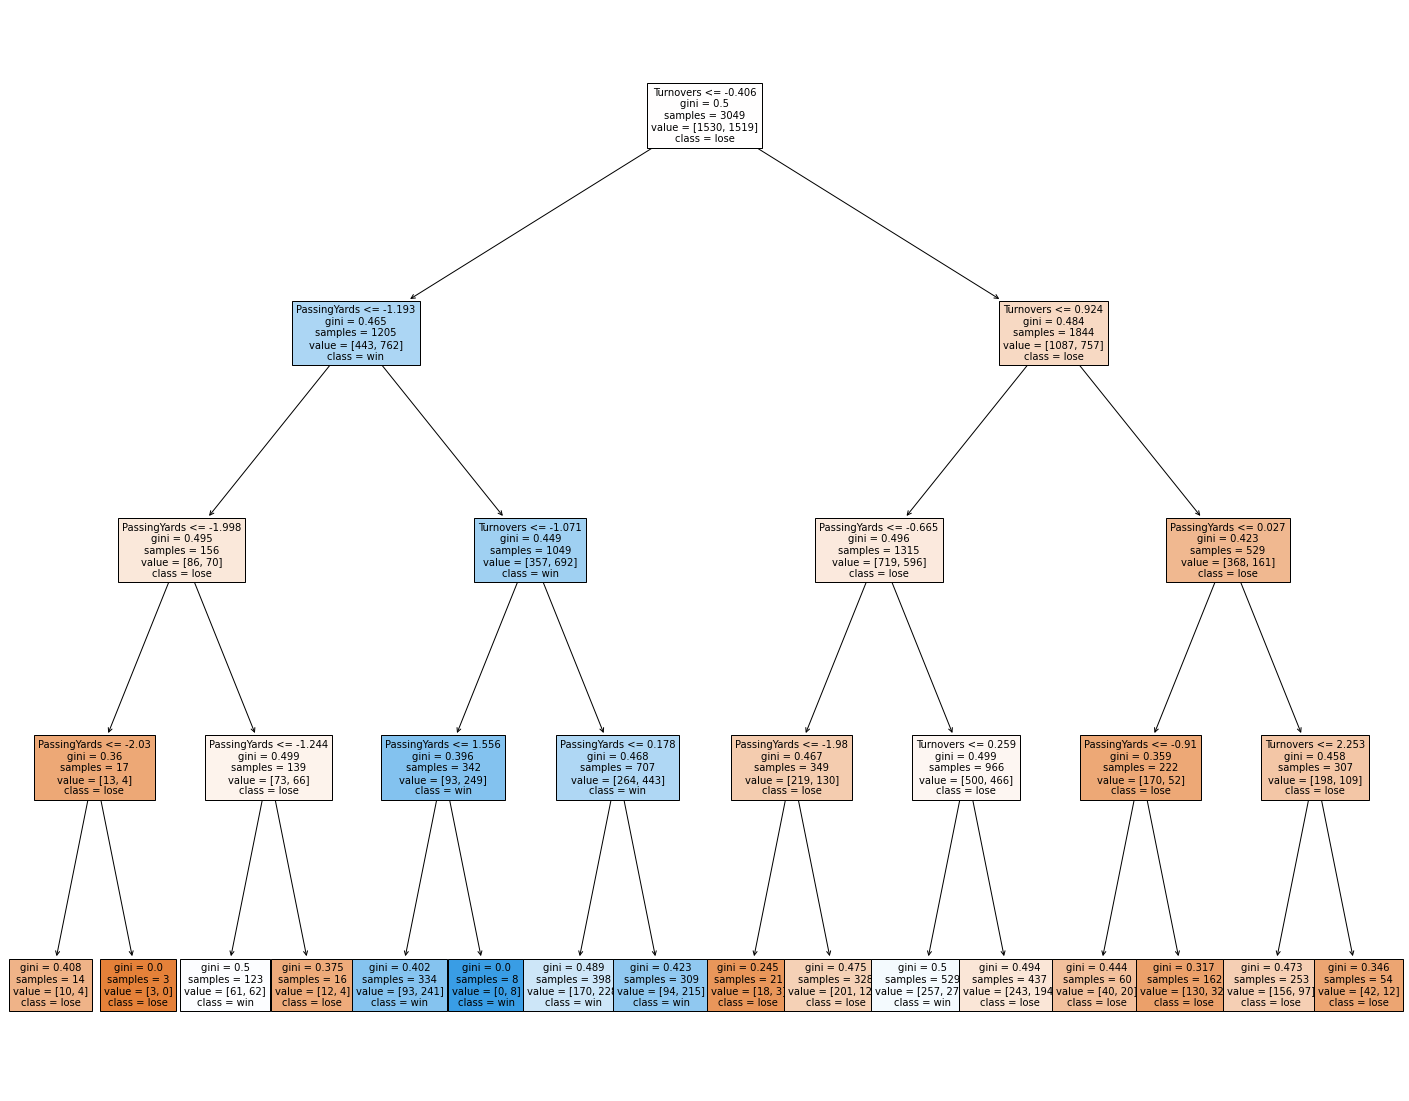

In [ ]:
d5 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,8]])

In [ ]:
#RunningYards and PenaltyYards
X = StandardScaler().fit_transform(df.loc[:, ['RunningYards','PenaltyYards']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6566186107470511
[[292  84]
 [178 209]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       376
           1       0.71      0.54      0.61       387

    accuracy                           0.66       763
   macro avg       0.67      0.66      0.65       763
weighted avg       0.67      0.66      0.65       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


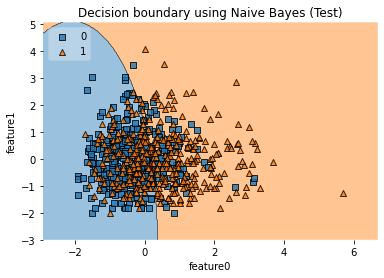

In [ ]:
p6 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6500655307994757
[[260 116]
 [151 236]]
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       376
           1       0.67      0.61      0.64       387

    accuracy                           0.65       763
   macro avg       0.65      0.65      0.65       763
weighted avg       0.65      0.65      0.65       763



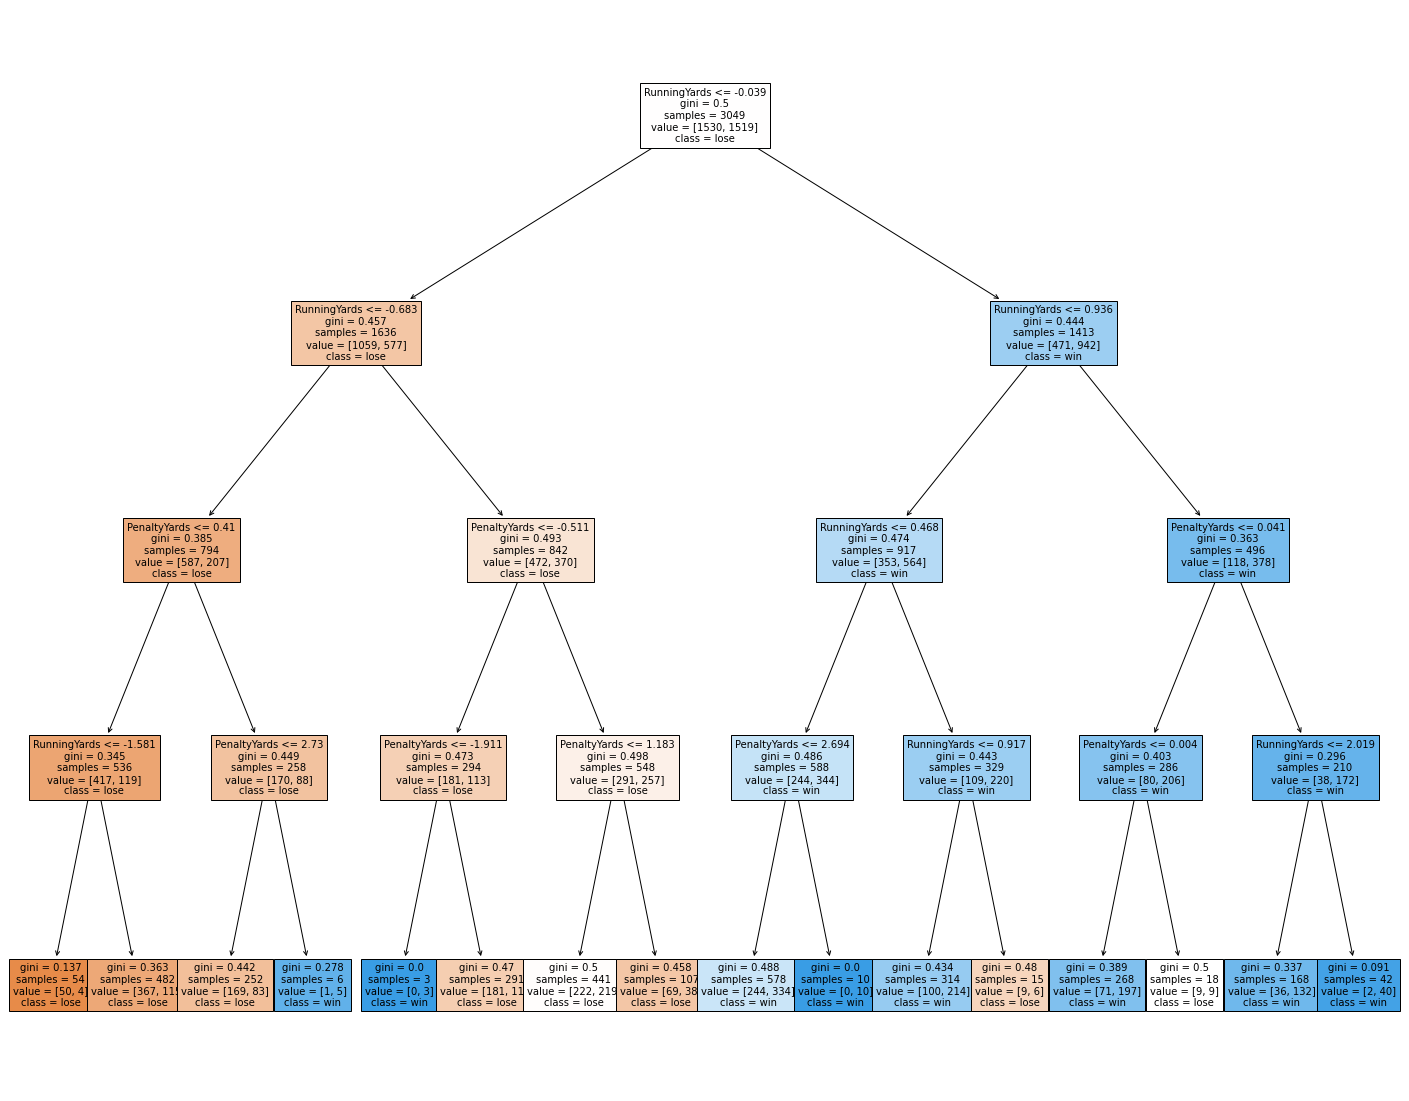

In [ ]:
d6 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[5,6]])

In [ ]:
#RunningYards and Penalties
X = StandardScaler().fit_transform(df.loc[:, ['RunningYards','Penalties']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6592398427260813
[[292  84]
 [176 211]]
              precision    recall  f1-score   support

           0       0.62      0.78      0.69       376
           1       0.72      0.55      0.62       387

    accuracy                           0.66       763
   macro avg       0.67      0.66      0.66       763
weighted avg       0.67      0.66      0.65       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


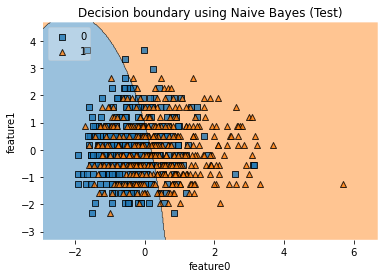

In [ ]:
p7 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.653997378768021
[[261 115]
 [149 238]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       376
           1       0.67      0.61      0.64       387

    accuracy                           0.65       763
   macro avg       0.66      0.65      0.65       763
weighted avg       0.66      0.65      0.65       763



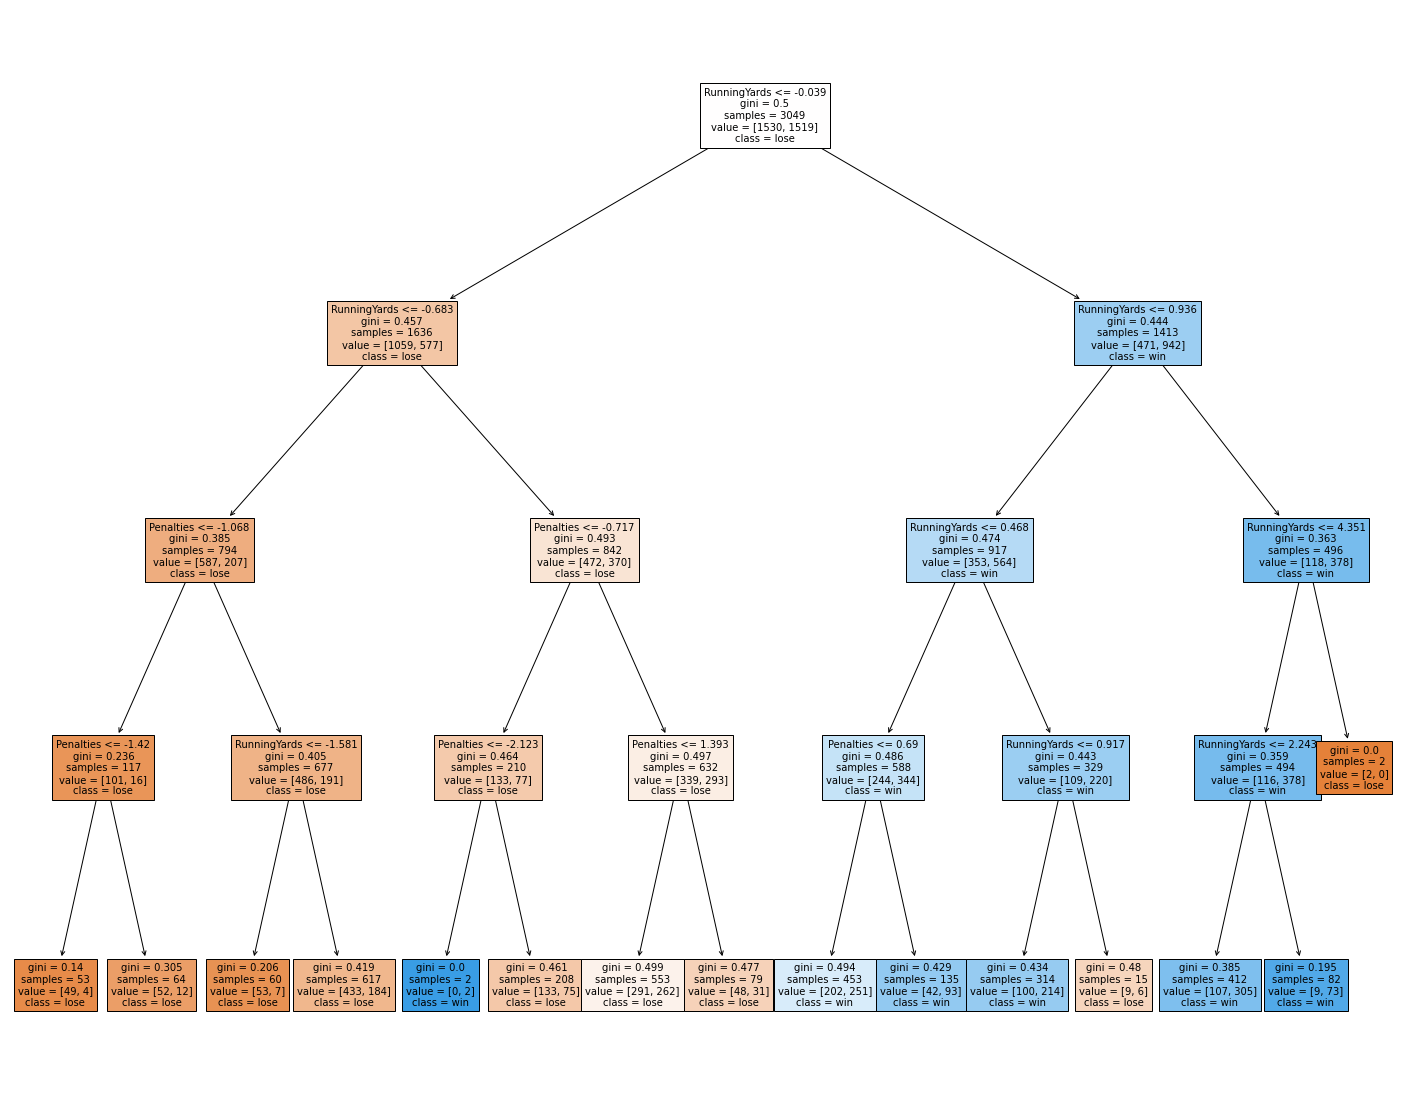

In [ ]:
d7 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[5,7]])

In [ ]:
#RunningYards and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['RunningYards','Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6841415465268676
[[269 107]
 [134 253]]
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       376
           1       0.70      0.65      0.68       387

    accuracy                           0.68       763
   macro avg       0.69      0.68      0.68       763
weighted avg       0.69      0.68      0.68       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


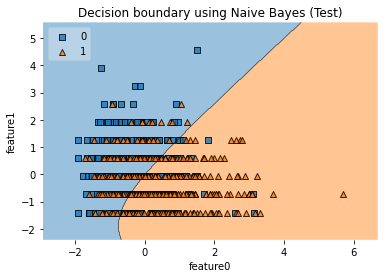

In [ ]:
p8 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6697247706422018
[[246 130]
 [122 265]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       376
           1       0.67      0.68      0.68       387

    accuracy                           0.67       763
   macro avg       0.67      0.67      0.67       763
weighted avg       0.67      0.67      0.67       763



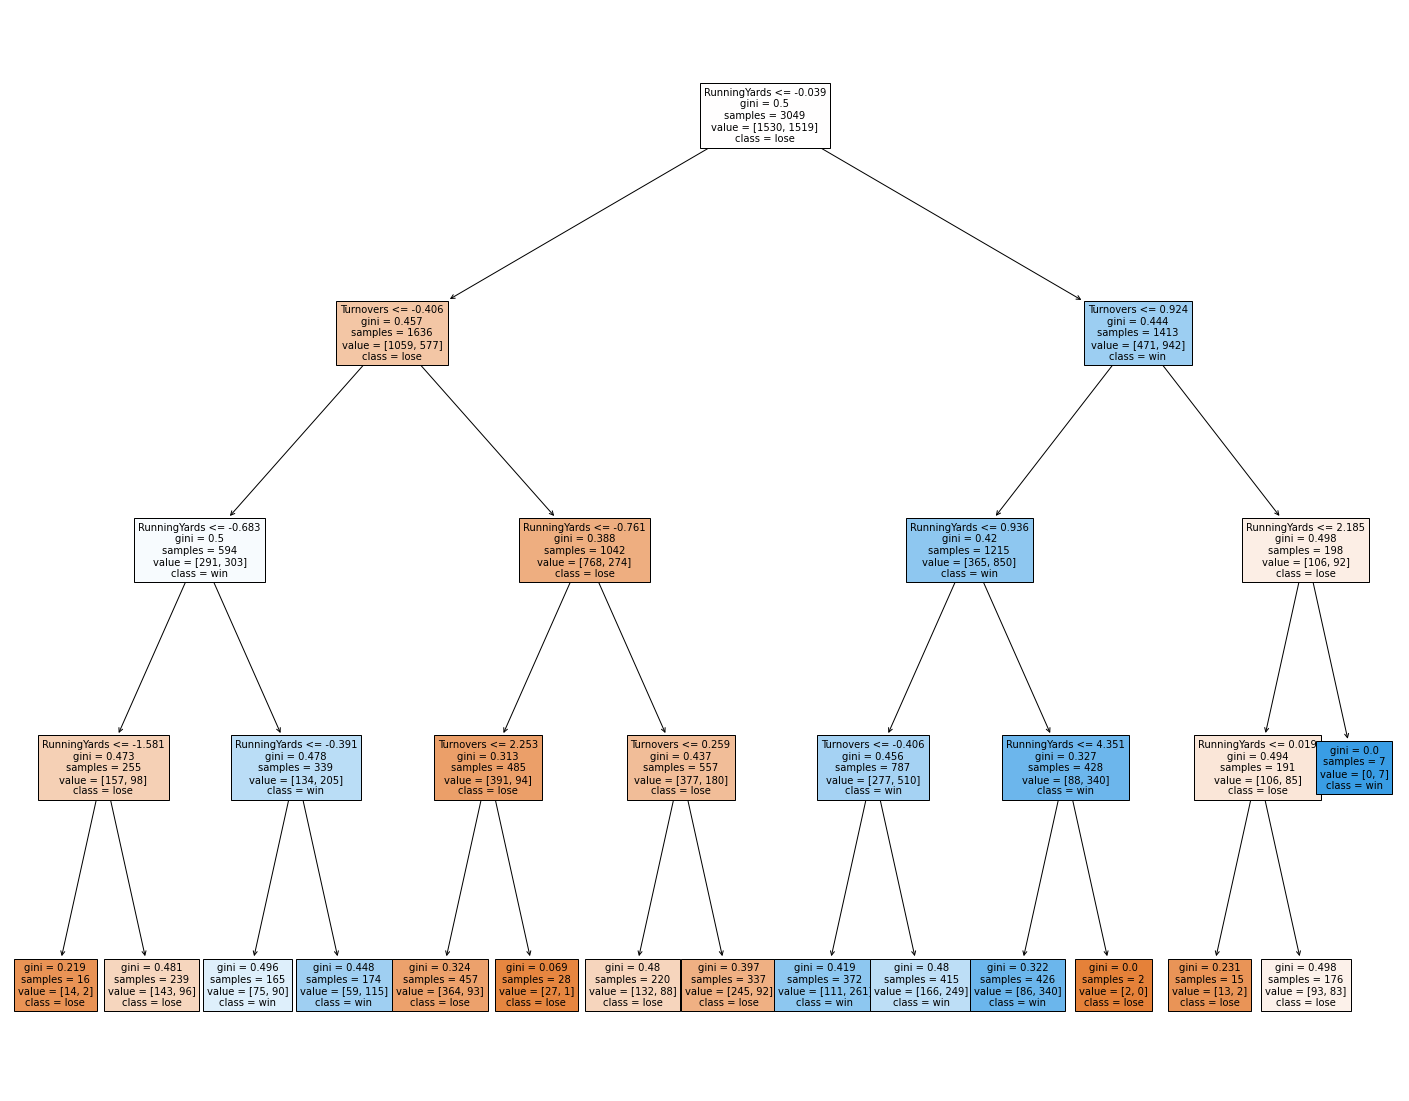

In [ ]:
d8 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[5,8]])

In [ ]:
#PenaltyYards and Penalties
X = StandardScaler().fit_transform(df.loc[:, ['PenaltyYards','Penalties']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.5019659239842726
[[222 154]
 [226 161]]
              precision    recall  f1-score   support

           0       0.50      0.59      0.54       376
           1       0.51      0.42      0.46       387

    accuracy                           0.50       763
   macro avg       0.50      0.50      0.50       763
weighted avg       0.50      0.50      0.50       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


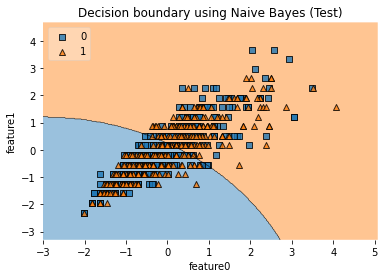

In [ ]:
p9 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.4927916120576671
[[284  92]
 [295  92]]
              precision    recall  f1-score   support

           0       0.49      0.76      0.59       376
           1       0.50      0.24      0.32       387

    accuracy                           0.49       763
   macro avg       0.50      0.50      0.46       763
weighted avg       0.50      0.49      0.46       763



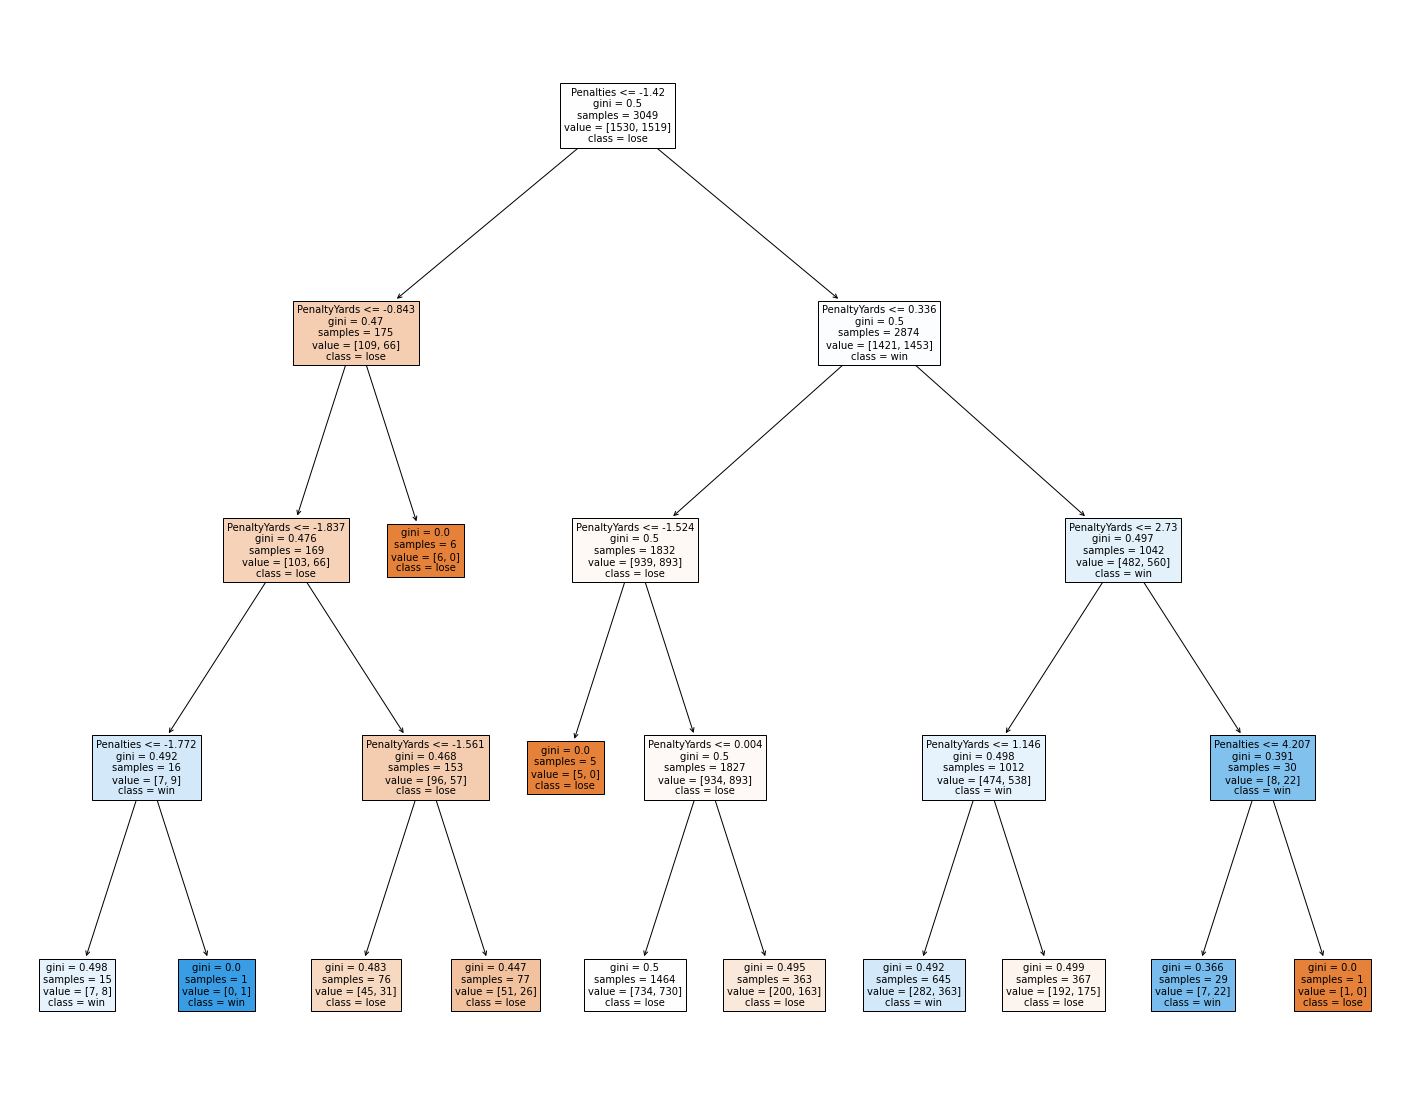

In [ ]:
d9 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[6,7]])

In [ ]:
#PenaltyYards and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['PenaltyYards','Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.5937090432503277
[[160 216]
 [ 94 293]]
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       376
           1       0.58      0.76      0.65       387

    accuracy                           0.59       763
   macro avg       0.60      0.59      0.58       763
weighted avg       0.60      0.59      0.58       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


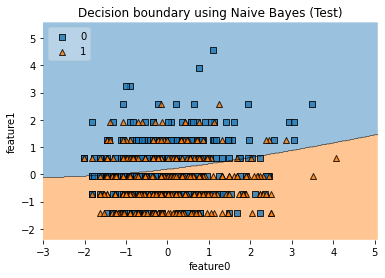

In [ ]:
p10 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6146788990825688
[[241 135]
 [159 228]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62       376
           1       0.63      0.59      0.61       387

    accuracy                           0.61       763
   macro avg       0.62      0.62      0.61       763
weighted avg       0.62      0.61      0.61       763



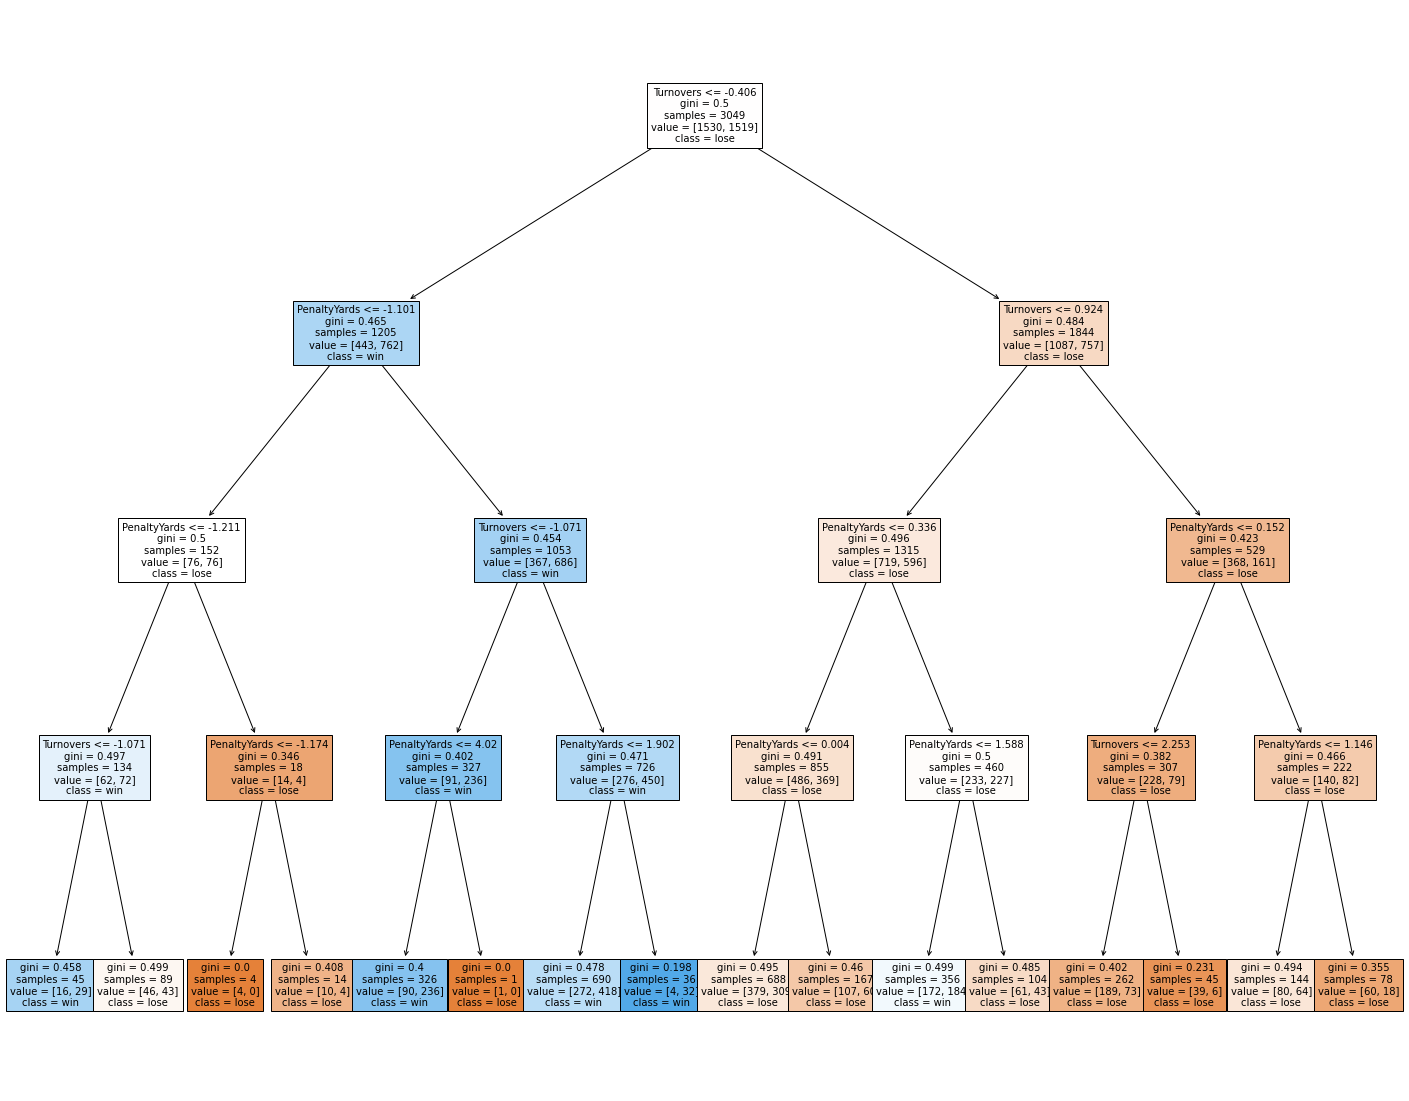

In [ ]:
d10 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[6,8]])

In [ ]:
#Penalties and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['Penalties','Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.601572739187418
[[175 201]
 [103 284]]
              precision    recall  f1-score   support

           0       0.63      0.47      0.54       376
           1       0.59      0.73      0.65       387

    accuracy                           0.60       763
   macro avg       0.61      0.60      0.59       763
weighted avg       0.61      0.60      0.59       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


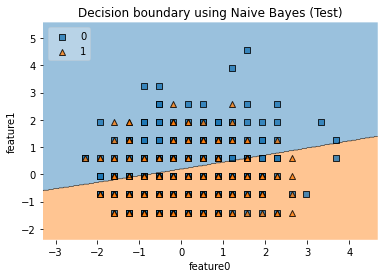

In [ ]:
p11 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6081258191349934
[[253 123]
 [176 211]]
              precision    recall  f1-score   support

           0       0.59      0.67      0.63       376
           1       0.63      0.55      0.59       387

    accuracy                           0.61       763
   macro avg       0.61      0.61      0.61       763
weighted avg       0.61      0.61      0.61       763



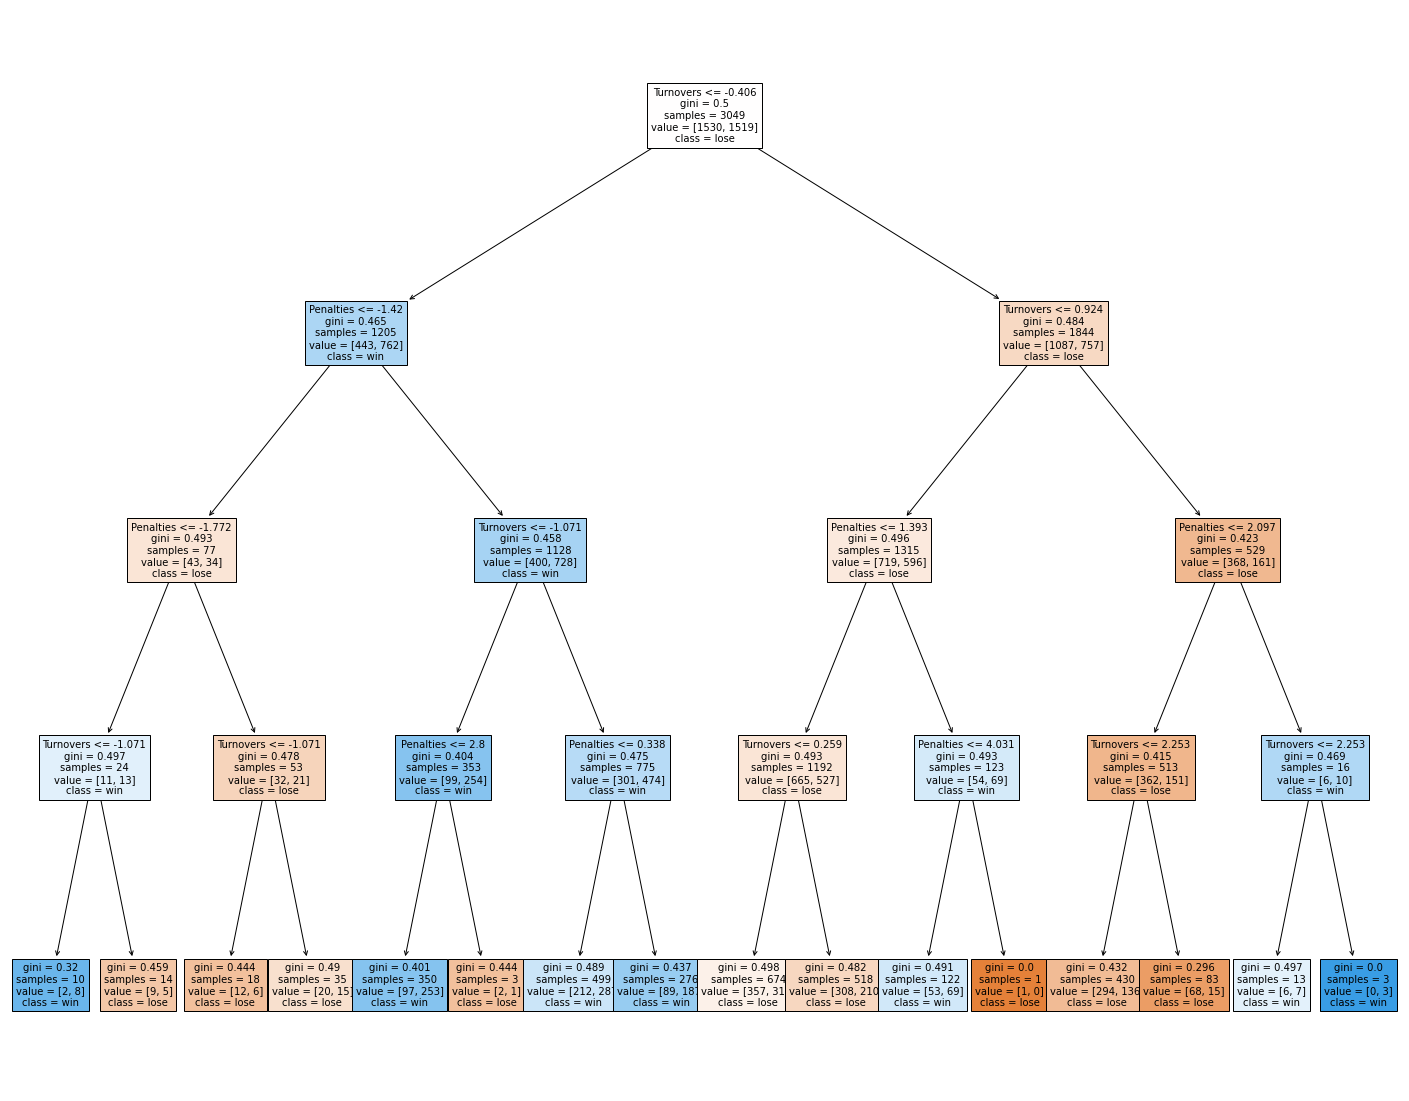

In [ ]:
d11 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[7,8]])

In [ ]:
#PassingYards, RunningYards and PenaltyYards
X = StandardScaler().fit_transform(df.loc[:, 'PassingYards':'PenaltyYards'].values)
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

In [ ]:
x_test

array([[ 2.77606361, -0.5759992 ,  2.34360004],
       [-1.77823557, -0.96623992, -0.71390317],
       [ 0.27245715,  0.1264341 , -0.3086919 ],
       ...,
       [-1.3127409 , -0.90770381, -0.67706578],
       [-0.63337031, -1.08331213,  0.39121847],
       [-0.58304656, -0.22478255, -0.52971623]])

Accuracy: 0.6854521625163827
[[297  79]
 [161 226]]
              precision    recall  f1-score   support

           0       0.65      0.79      0.71       376
           1       0.74      0.58      0.65       387

    accuracy                           0.69       763
   macro avg       0.69      0.69      0.68       763
weighted avg       0.70      0.69      0.68       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


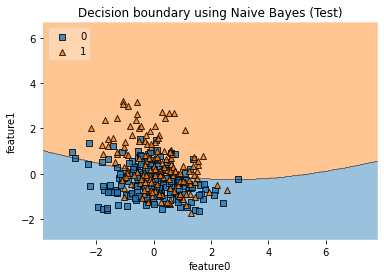

In [ ]:
p12 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6513761467889908
[[224 152]
 [114 273]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       376
           1       0.64      0.71      0.67       387

    accuracy                           0.65       763
   macro avg       0.65      0.65      0.65       763
weighted avg       0.65      0.65      0.65       763



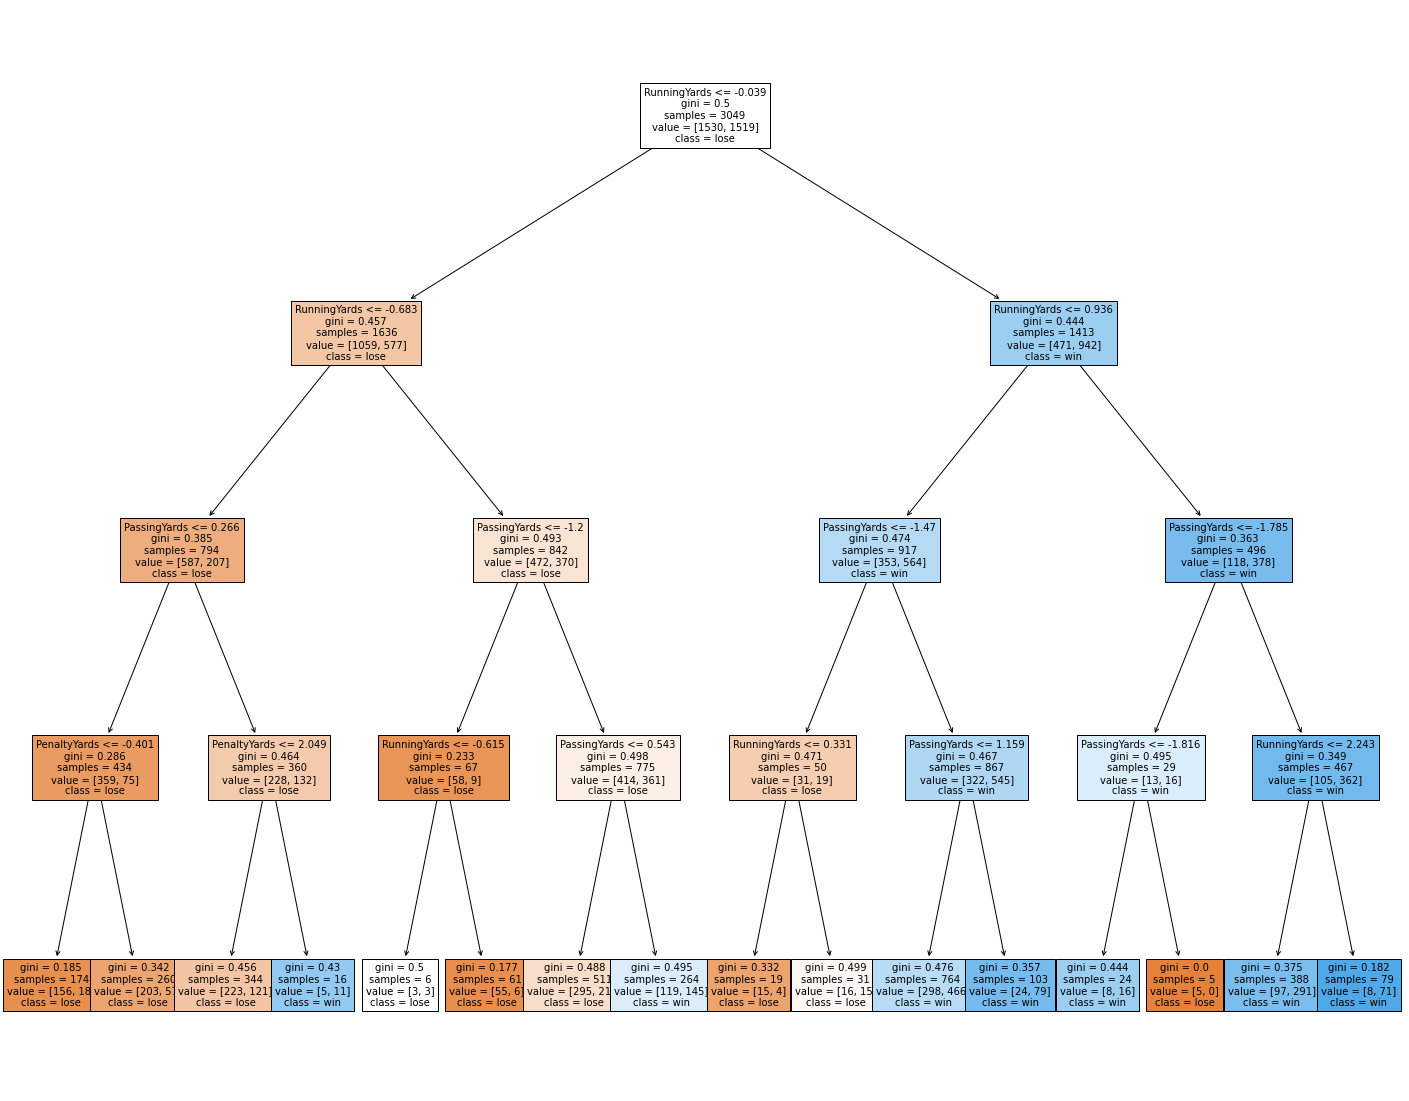

In [ ]:
d12 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,5,6]])

In [ ]:
#RunningYards, PenaltyYards and Penalties
X = StandardScaler().fit_transform(df.loc[:, 'RunningYards':'Penalties'].values)
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6513761467889908
[[281  95]
 [171 216]]
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       376
           1       0.69      0.56      0.62       387

    accuracy                           0.65       763
   macro avg       0.66      0.65      0.65       763
weighted avg       0.66      0.65      0.65       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


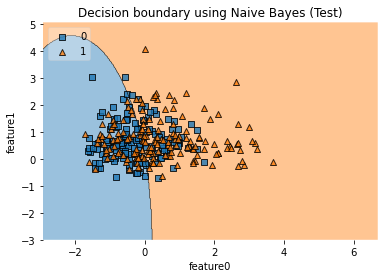

In [ ]:
p13 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6500655307994757
[[260 116]
 [151 236]]
              precision    recall  f1-score   support

           0       0.63      0.69      0.66       376
           1       0.67      0.61      0.64       387

    accuracy                           0.65       763
   macro avg       0.65      0.65      0.65       763
weighted avg       0.65      0.65      0.65       763



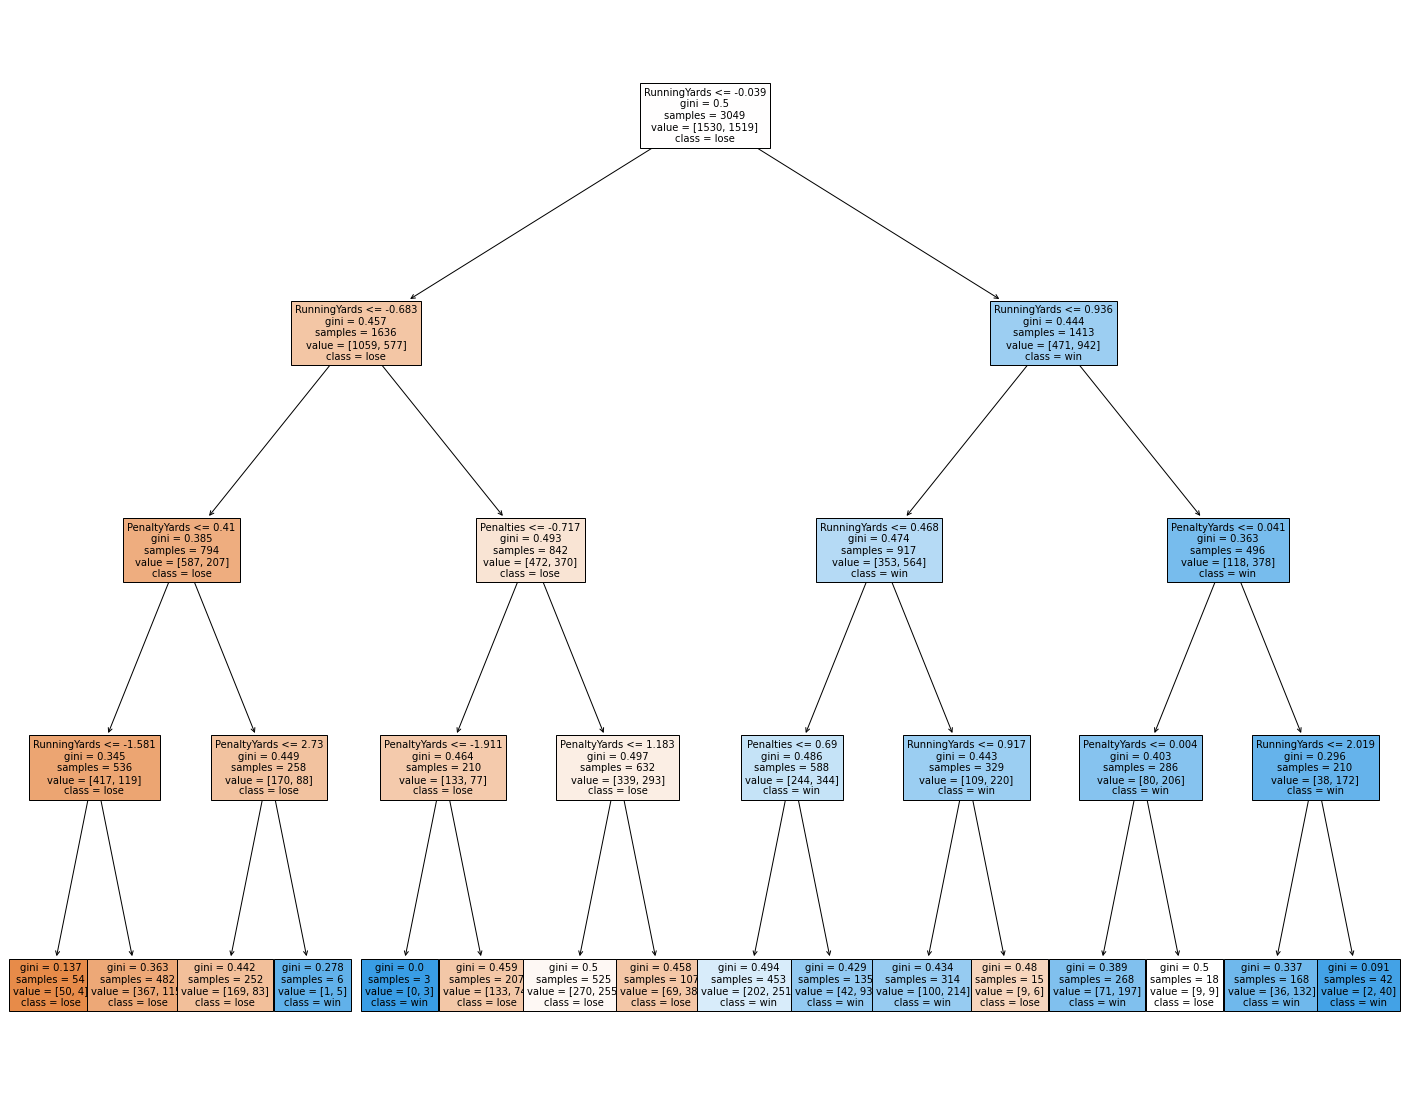

In [ ]:
d13 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[5,6,7]])

In [ ]:
#PenaltyYards, Penalties and Turnovers
X = StandardScaler().fit_transform(df.loc[:, 'PenaltyYards':'Turnovers'].values)
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6068152031454783
[[191 185]
 [115 272]]
              precision    recall  f1-score   support

           0       0.62      0.51      0.56       376
           1       0.60      0.70      0.64       387

    accuracy                           0.61       763
   macro avg       0.61      0.61      0.60       763
weighted avg       0.61      0.61      0.60       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


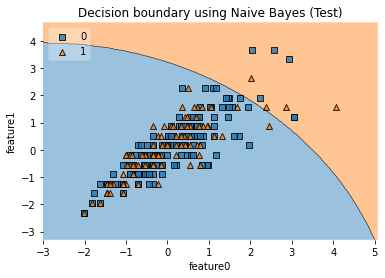

In [ ]:
p14 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6094364351245085
[[259 117]
 [181 206]]
              precision    recall  f1-score   support

           0       0.59      0.69      0.63       376
           1       0.64      0.53      0.58       387

    accuracy                           0.61       763
   macro avg       0.61      0.61      0.61       763
weighted avg       0.61      0.61      0.61       763



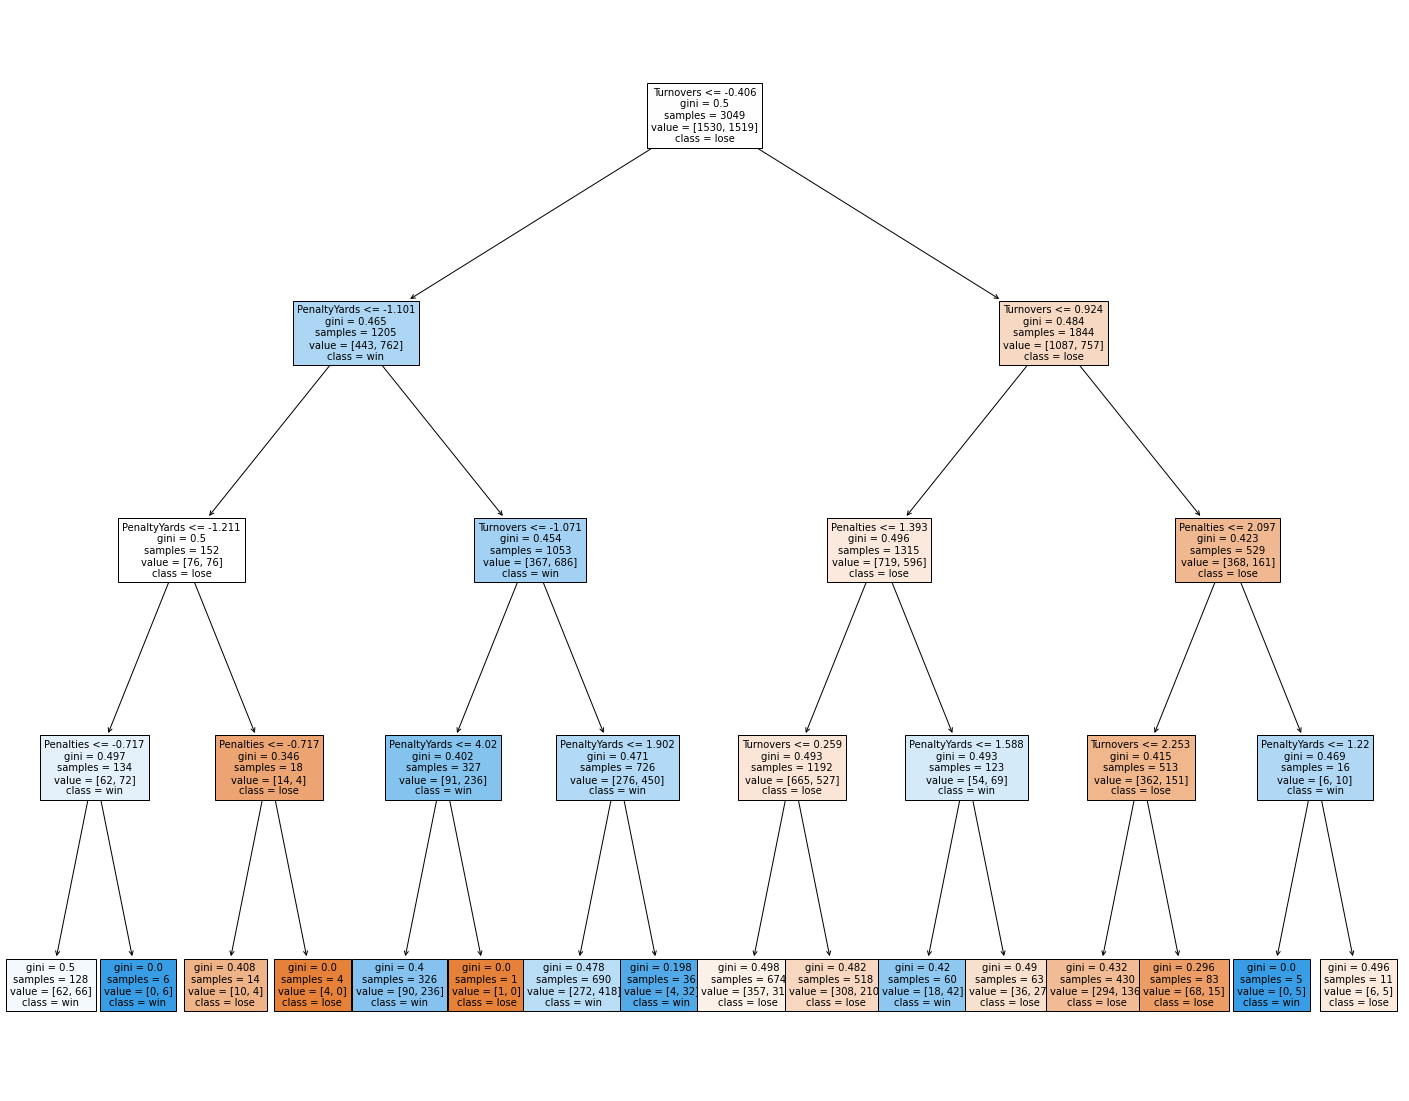

In [ ]:
d14 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[6,7,8]])

In [ ]:
#PassingYards, PenaltyYards and Penalties
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','PenaltyYards','Penalties']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.5203145478374837
[[217 159]
 [207 180]]
              precision    recall  f1-score   support

           0       0.51      0.58      0.54       376
           1       0.53      0.47      0.50       387

    accuracy                           0.52       763
   macro avg       0.52      0.52      0.52       763
weighted avg       0.52      0.52      0.52       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


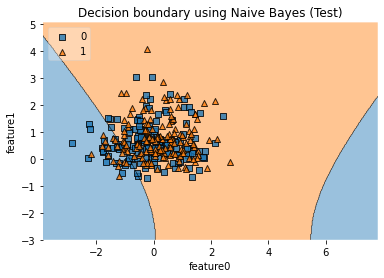

In [ ]:
p15 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.5111402359108781
[[233 143]
 [230 157]]
              precision    recall  f1-score   support

           0       0.50      0.62      0.56       376
           1       0.52      0.41      0.46       387

    accuracy                           0.51       763
   macro avg       0.51      0.51      0.51       763
weighted avg       0.51      0.51      0.51       763



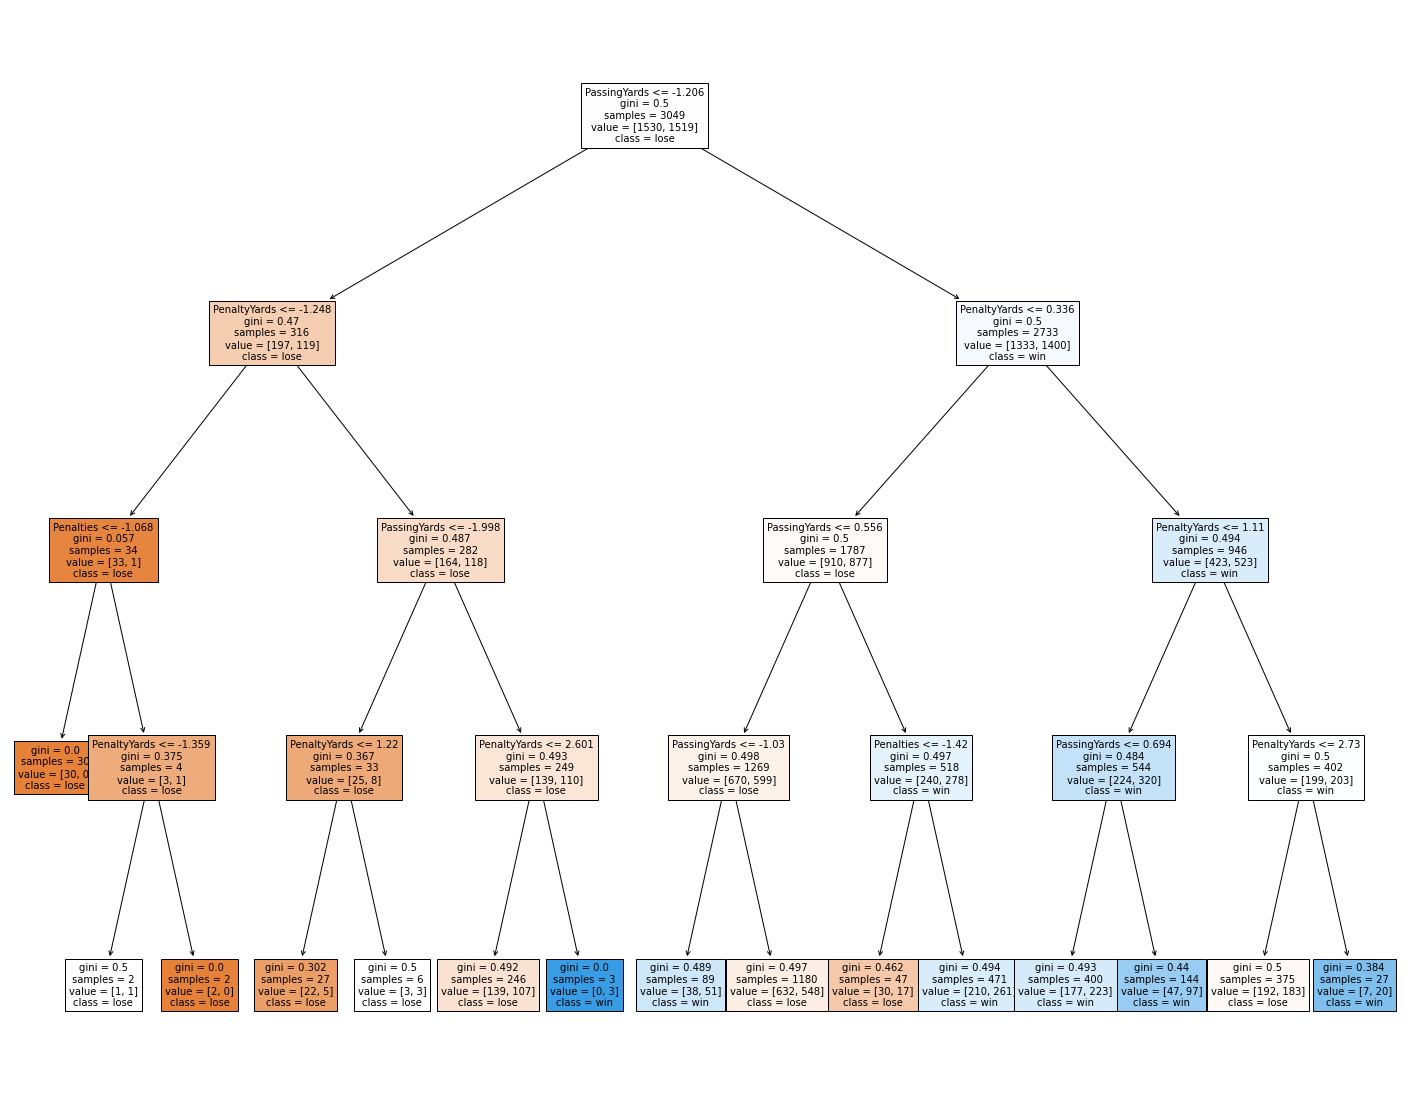

In [ ]:
d15 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,6,7]])

In [ ]:
#PassingYards, Penalties and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','Penalties', 'Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6107470511140236
[[188 188]
 [109 278]]
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       376
           1       0.60      0.72      0.65       387

    accuracy                           0.61       763
   macro avg       0.61      0.61      0.61       763
weighted avg       0.61      0.61      0.61       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


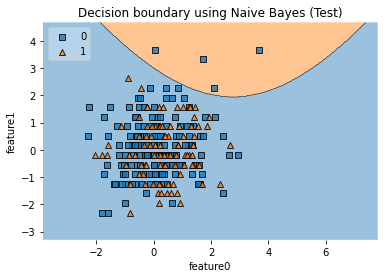

In [ ]:
p16 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6002621231979031
[[195 181]
 [124 263]]
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       376
           1       0.59      0.68      0.63       387

    accuracy                           0.60       763
   macro avg       0.60      0.60      0.60       763
weighted avg       0.60      0.60      0.60       763



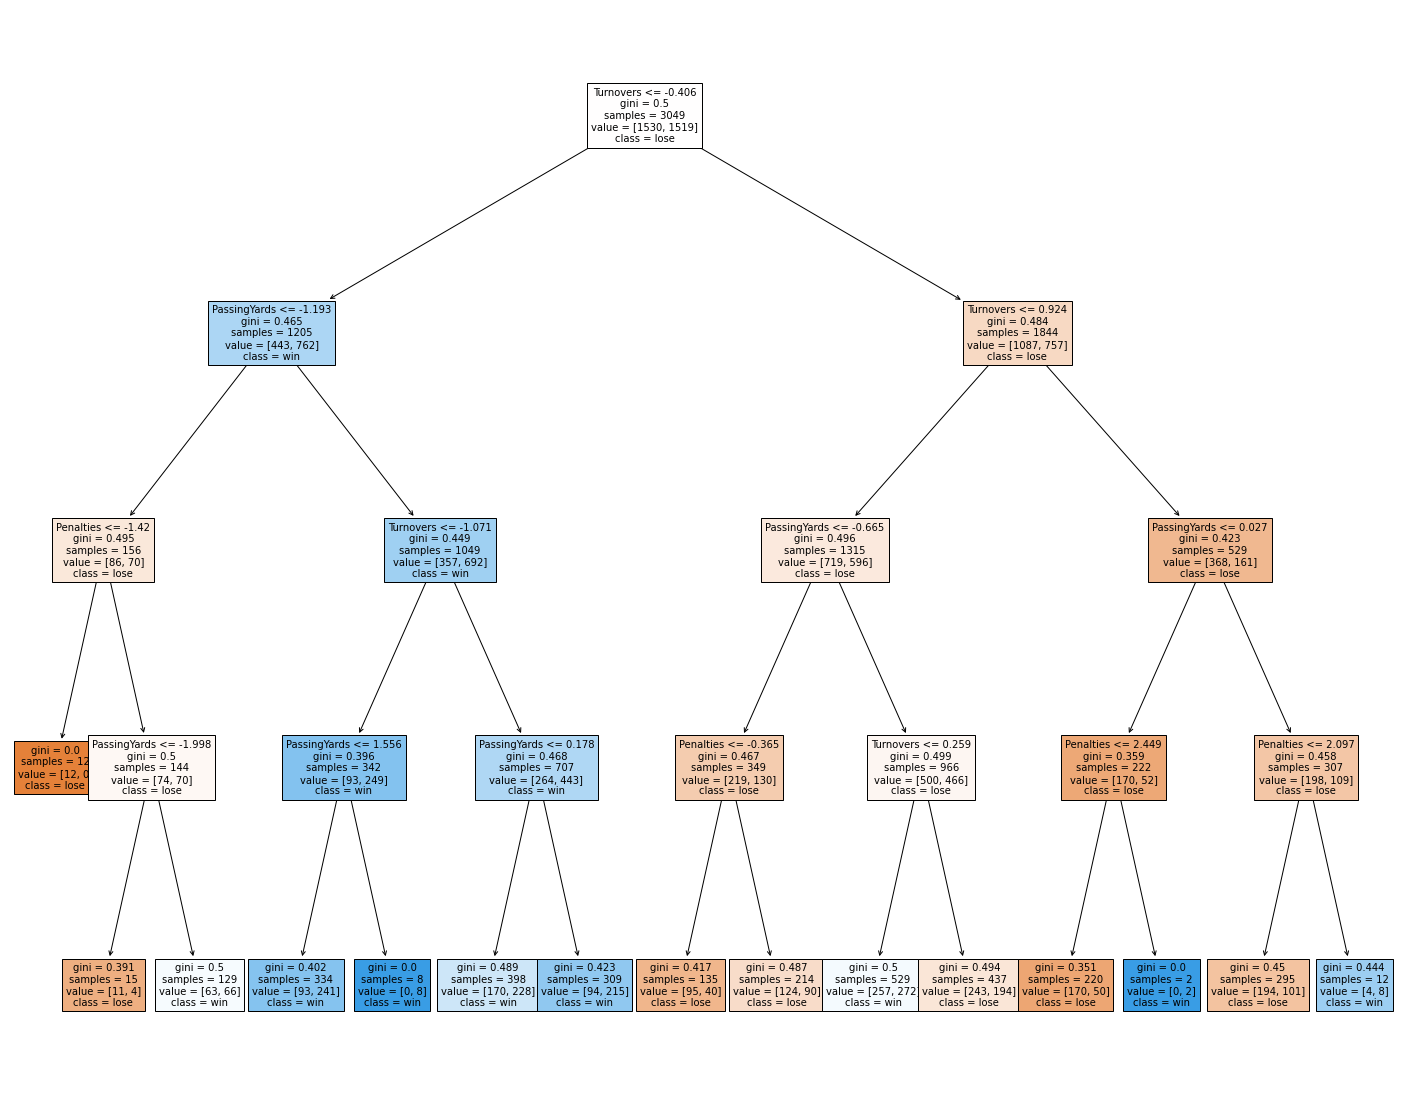

In [ ]:
d16 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,7,8]])

In [ ]:
#RunningYards, Penalties and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['RunningYards','Penalties', 'Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6697247706422018
[[268 108]
 [144 243]]
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       376
           1       0.69      0.63      0.66       387

    accuracy                           0.67       763
   macro avg       0.67      0.67      0.67       763
weighted avg       0.67      0.67      0.67       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


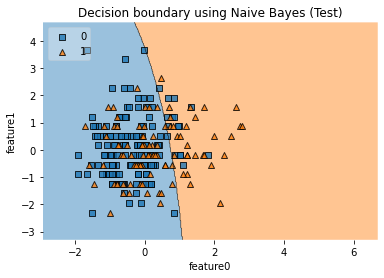

In [ ]:
p17 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6684141546526867
[[244 132]
 [121 266]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       376
           1       0.67      0.69      0.68       387

    accuracy                           0.67       763
   macro avg       0.67      0.67      0.67       763
weighted avg       0.67      0.67      0.67       763



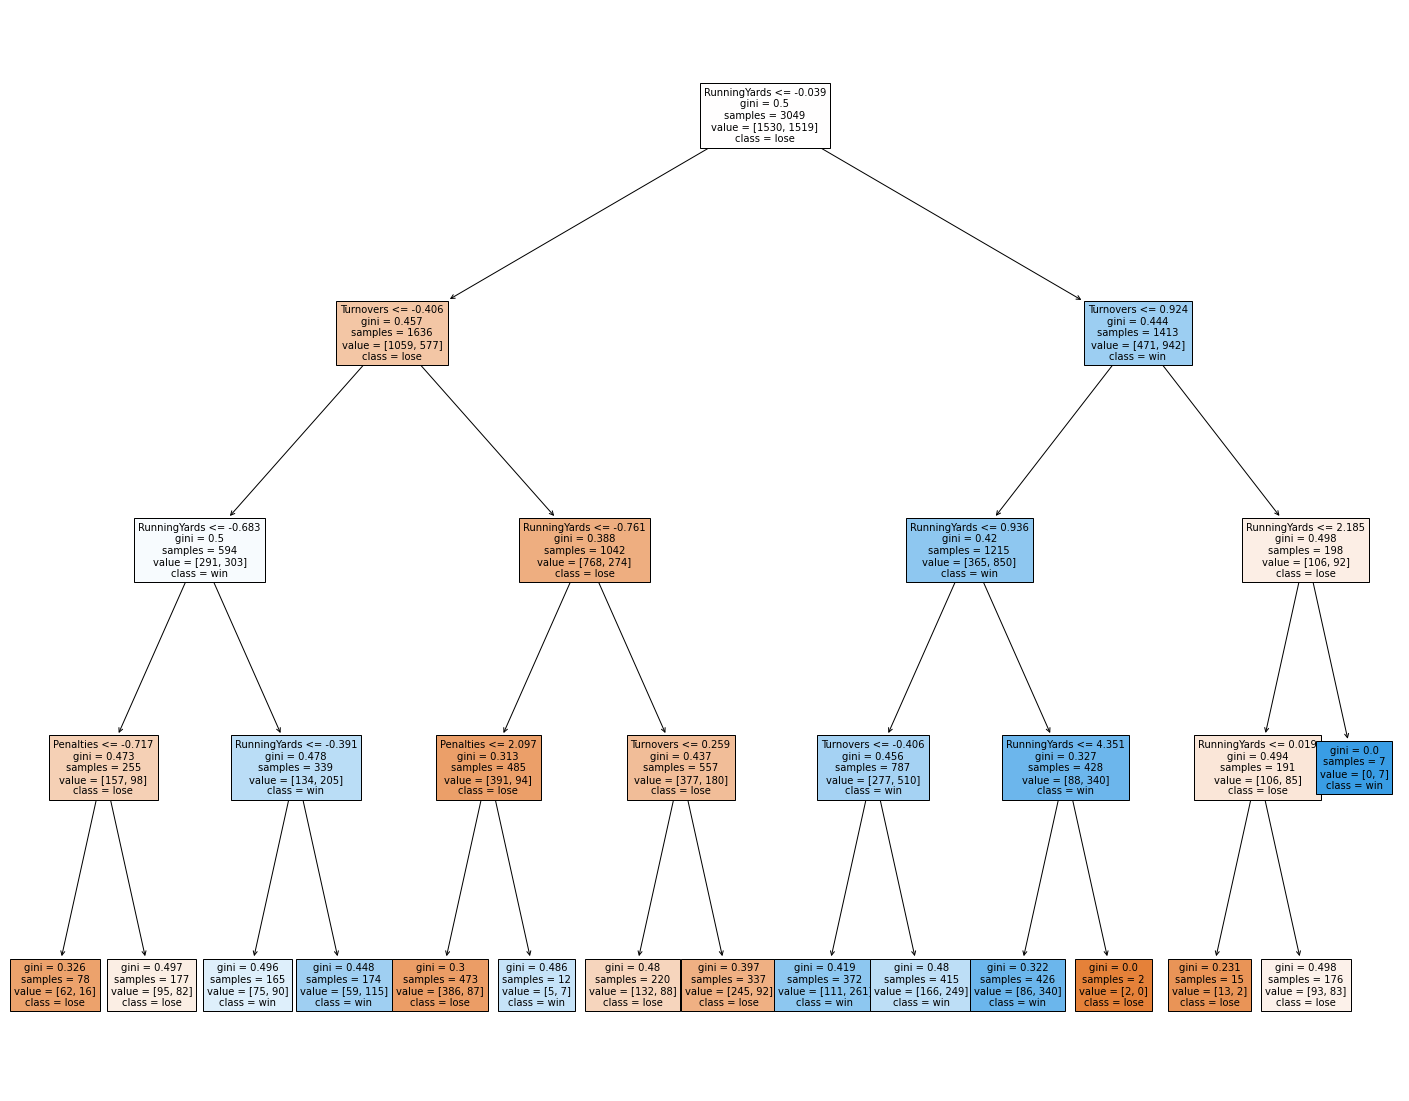

In [ ]:
d17 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[5,7,8]])

In [ ]:
#PassingYards, RunningYards, PenaltyYards and Penalties
X = StandardScaler().fit_transform(df.loc[:,'PassingYards':'Penalties'].values)
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6736566186107471
[[289  87]
 [162 225]]
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       376
           1       0.72      0.58      0.64       387

    accuracy                           0.67       763
   macro avg       0.68      0.68      0.67       763
weighted avg       0.68      0.67      0.67       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


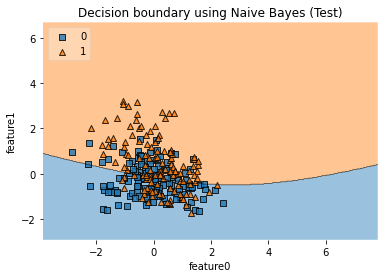

In [ ]:
p18 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6513761467889908
[[224 152]
 [114 273]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.63       376
           1       0.64      0.71      0.67       387

    accuracy                           0.65       763
   macro avg       0.65      0.65      0.65       763
weighted avg       0.65      0.65      0.65       763



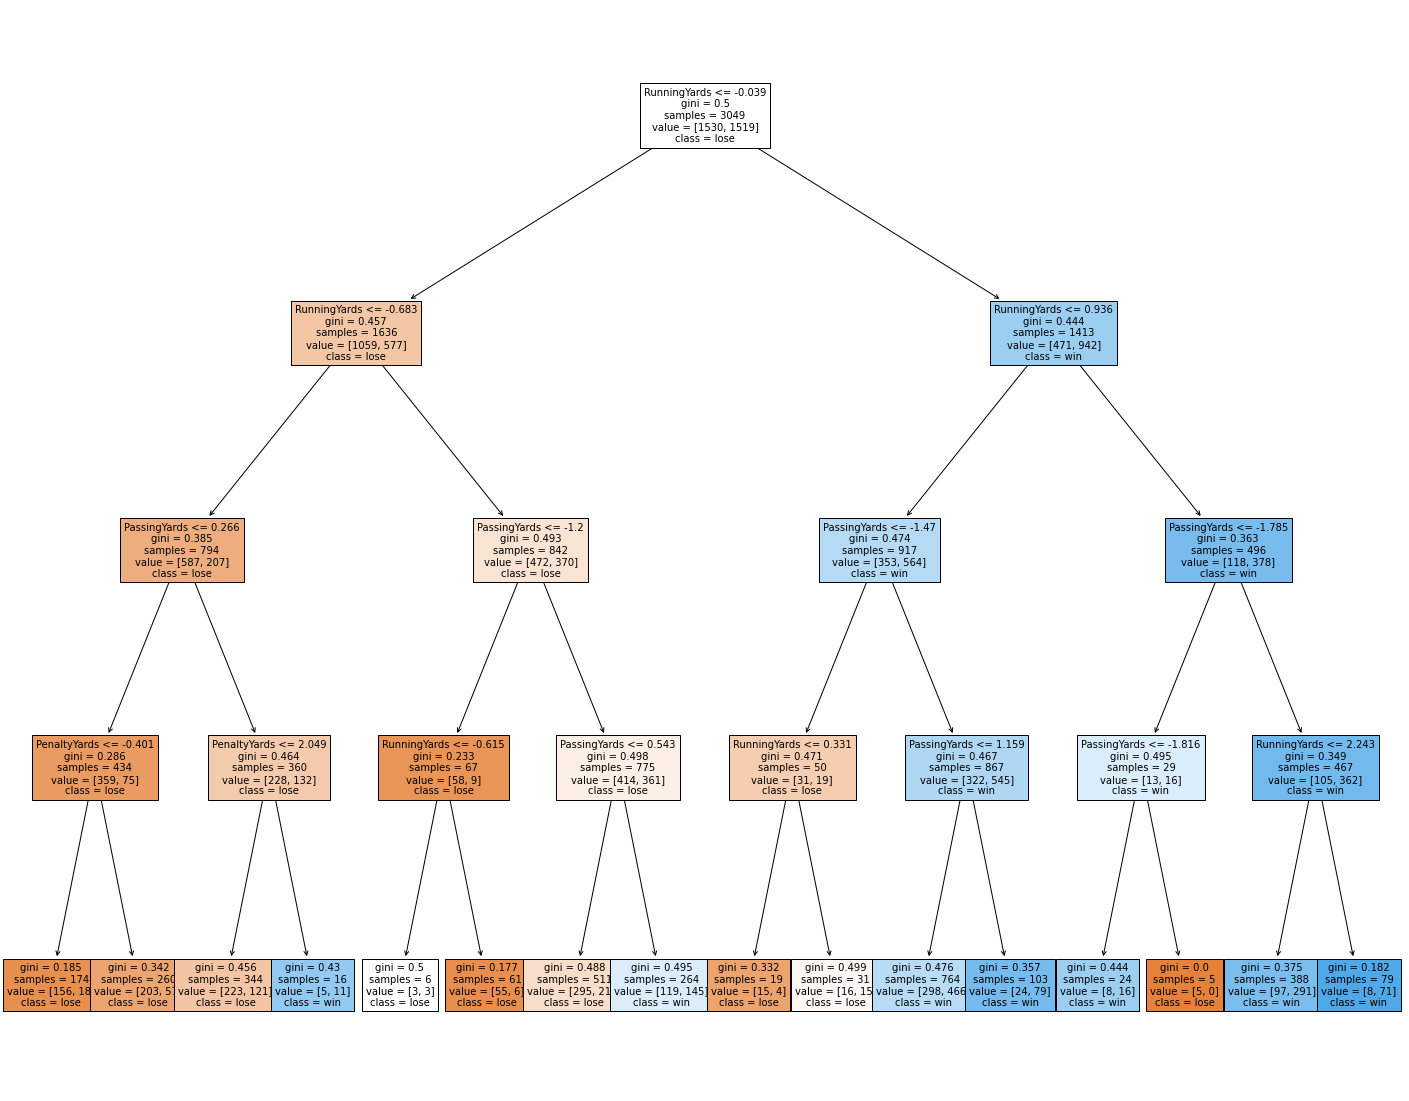

In [ ]:
d18 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,5,6,7]])

In [ ]:
# RunningYards, PenaltyYards, Penalties and Turnovers
X = StandardScaler().fit_transform(df.loc[:,'RunningYards':'Turnovers'].values)
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6775884665792923
[[269 107]
 [139 248]]
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       376
           1       0.70      0.64      0.67       387

    accuracy                           0.68       763
   macro avg       0.68      0.68      0.68       763
weighted avg       0.68      0.68      0.68       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


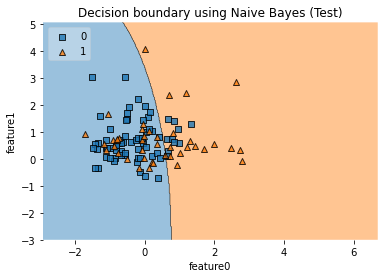

In [ ]:
p19 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6684141546526867
[[244 132]
 [121 266]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66       376
           1       0.67      0.69      0.68       387

    accuracy                           0.67       763
   macro avg       0.67      0.67      0.67       763
weighted avg       0.67      0.67      0.67       763



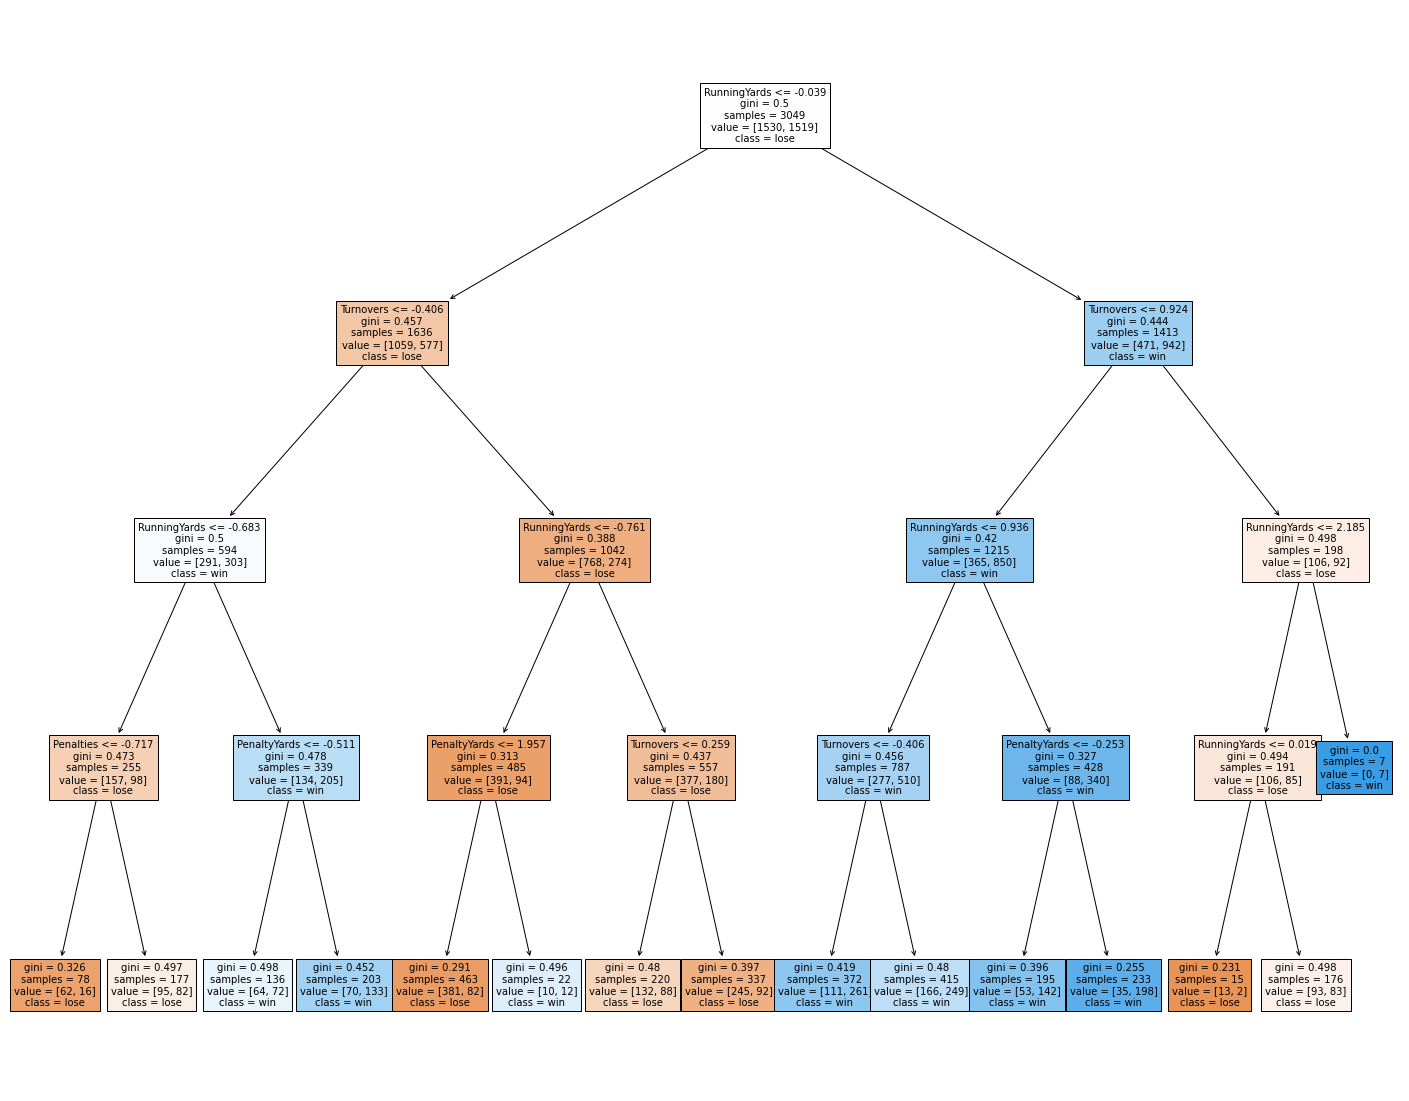

In [ ]:
d19 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[5,6,7,8]])

In [ ]:
# PassingYards, PenaltyYards, Penalties and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards', 'PenaltyYards','Penalties', 'Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.6094364351245085
[[198 178]
 [120 267]]
              precision    recall  f1-score   support

           0       0.62      0.53      0.57       376
           1       0.60      0.69      0.64       387

    accuracy                           0.61       763
   macro avg       0.61      0.61      0.61       763
weighted avg       0.61      0.61      0.61       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


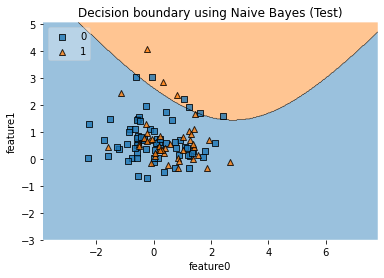

In [ ]:
p20 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6081258191349934
[[204 172]
 [127 260]]
              precision    recall  f1-score   support

           0       0.62      0.54      0.58       376
           1       0.60      0.67      0.63       387

    accuracy                           0.61       763
   macro avg       0.61      0.61      0.61       763
weighted avg       0.61      0.61      0.61       763



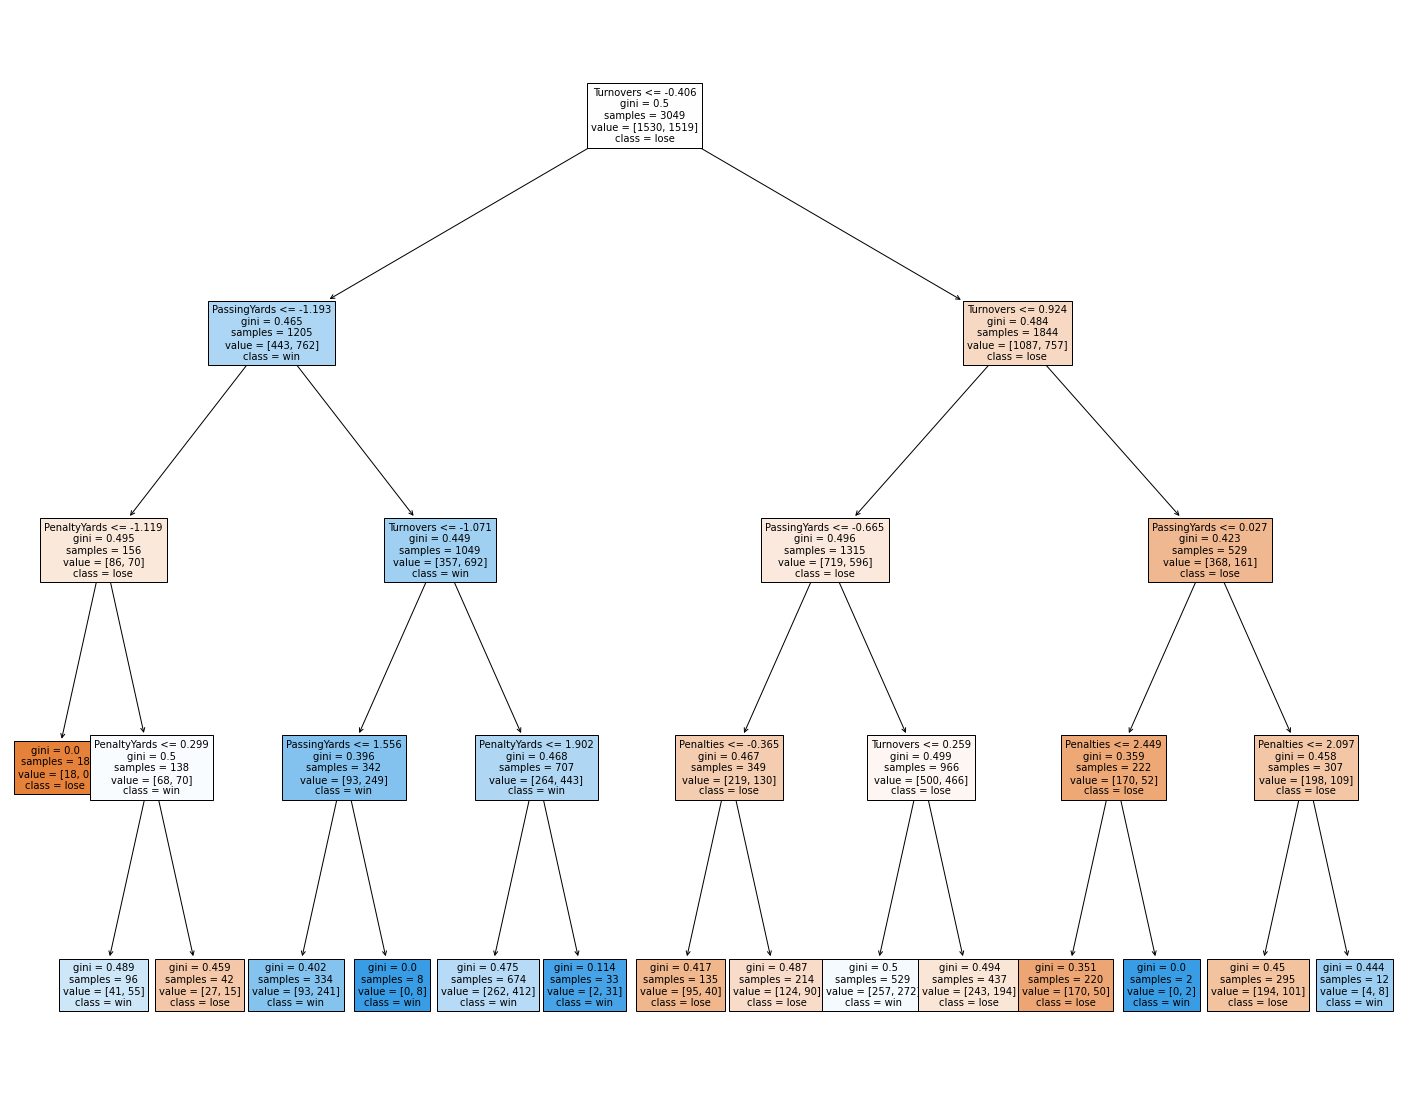

In [ ]:
d20 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,6,7,8]])

In [ ]:
#PassingYards, RunningYards, Penalties and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','RunningYards','Penalties', 'Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.7011795543905636
[[275 101]
 [127 260]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       376
           1       0.72      0.67      0.70       387

    accuracy                           0.70       763
   macro avg       0.70      0.70      0.70       763
weighted avg       0.70      0.70      0.70       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


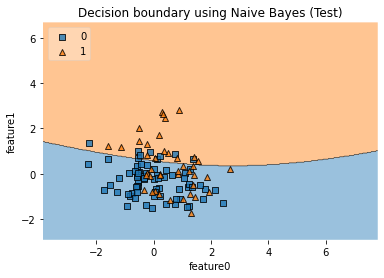

In [ ]:
p21 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6893840104849279
[[258 118]
 [119 268]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       376
           1       0.69      0.69      0.69       387

    accuracy                           0.69       763
   macro avg       0.69      0.69      0.69       763
weighted avg       0.69      0.69      0.69       763



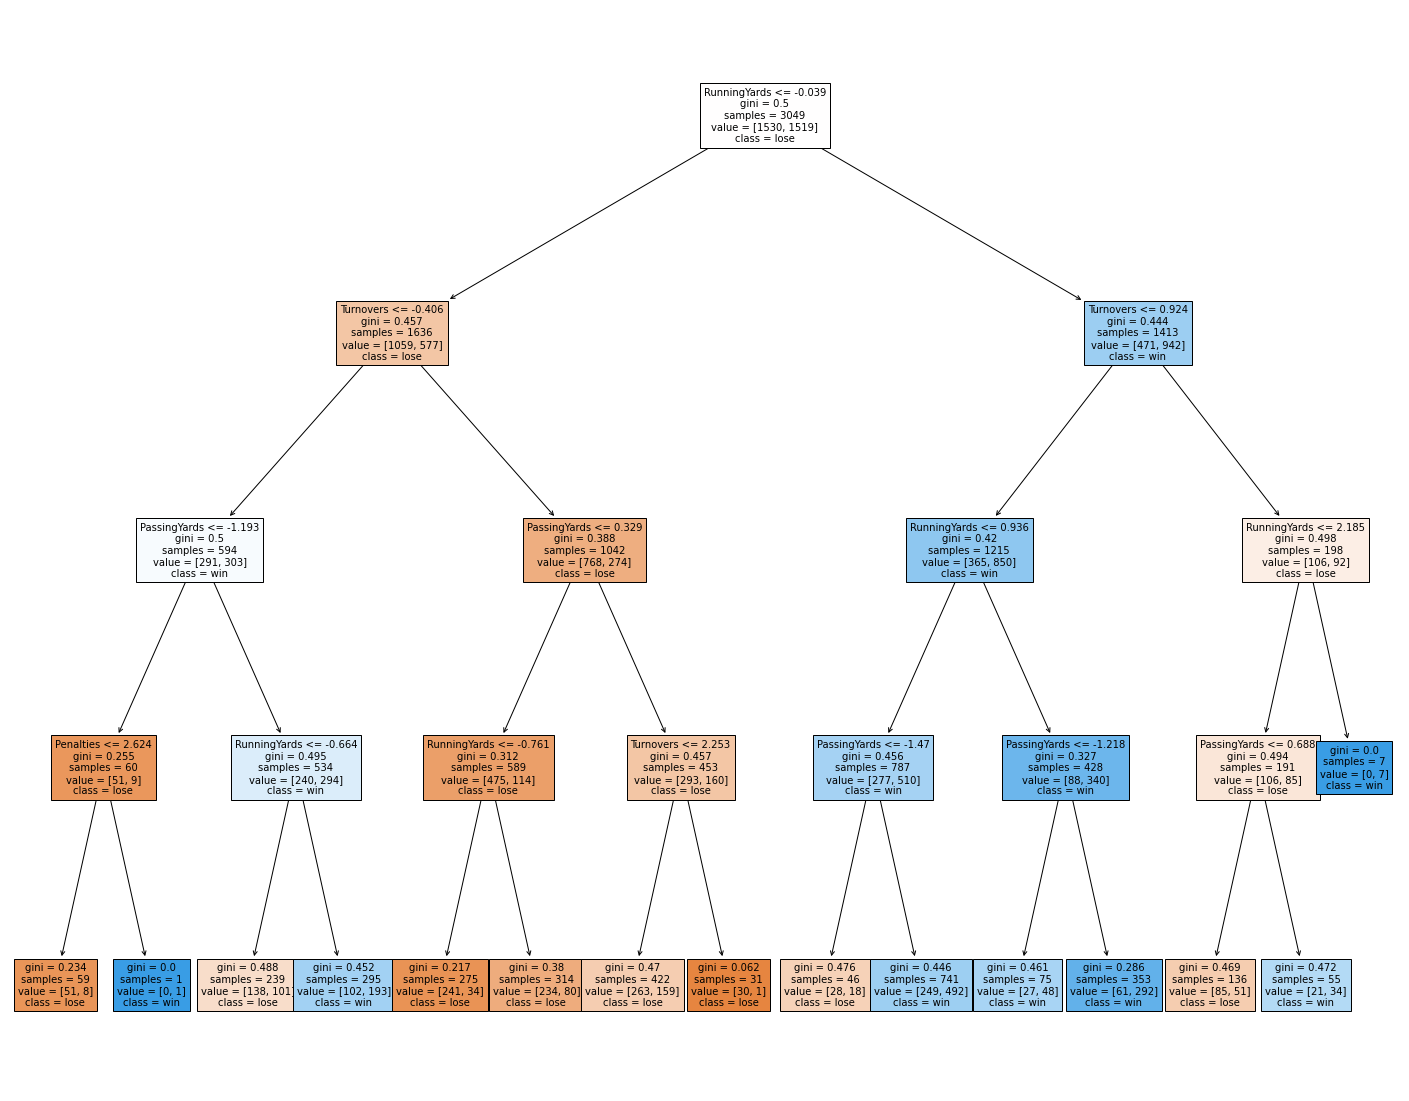

In [ ]:
d21 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,5,7,8]])

In [ ]:
#PassingYards, RunningYards, PenaltyYards and Turnovers
X = StandardScaler().fit_transform(df.loc[:, ['PassingYards','RunningYards', 'PenaltyYards', 'Turnovers']])
y = df.loc[:,'Win_Lose']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=420)

Accuracy: 0.7116644823066841
[[283  93]
 [127 260]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       376
           1       0.74      0.67      0.70       387

    accuracy                           0.71       763
   macro avg       0.71      0.71      0.71       763
weighted avg       0.71      0.71      0.71       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


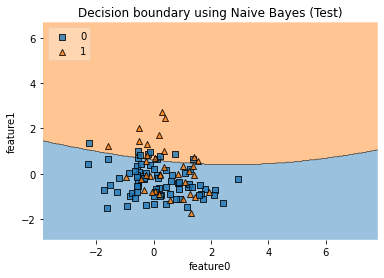

In [ ]:
p22 = Naive_bayes(x_train, y_train, x_test, y_test)

Accuracy: 0.6893840104849279
[[258 118]
 [119 268]]
              precision    recall  f1-score   support

           0       0.68      0.69      0.69       376
           1       0.69      0.69      0.69       387

    accuracy                           0.69       763
   macro avg       0.69      0.69      0.69       763
weighted avg       0.69      0.69      0.69       763



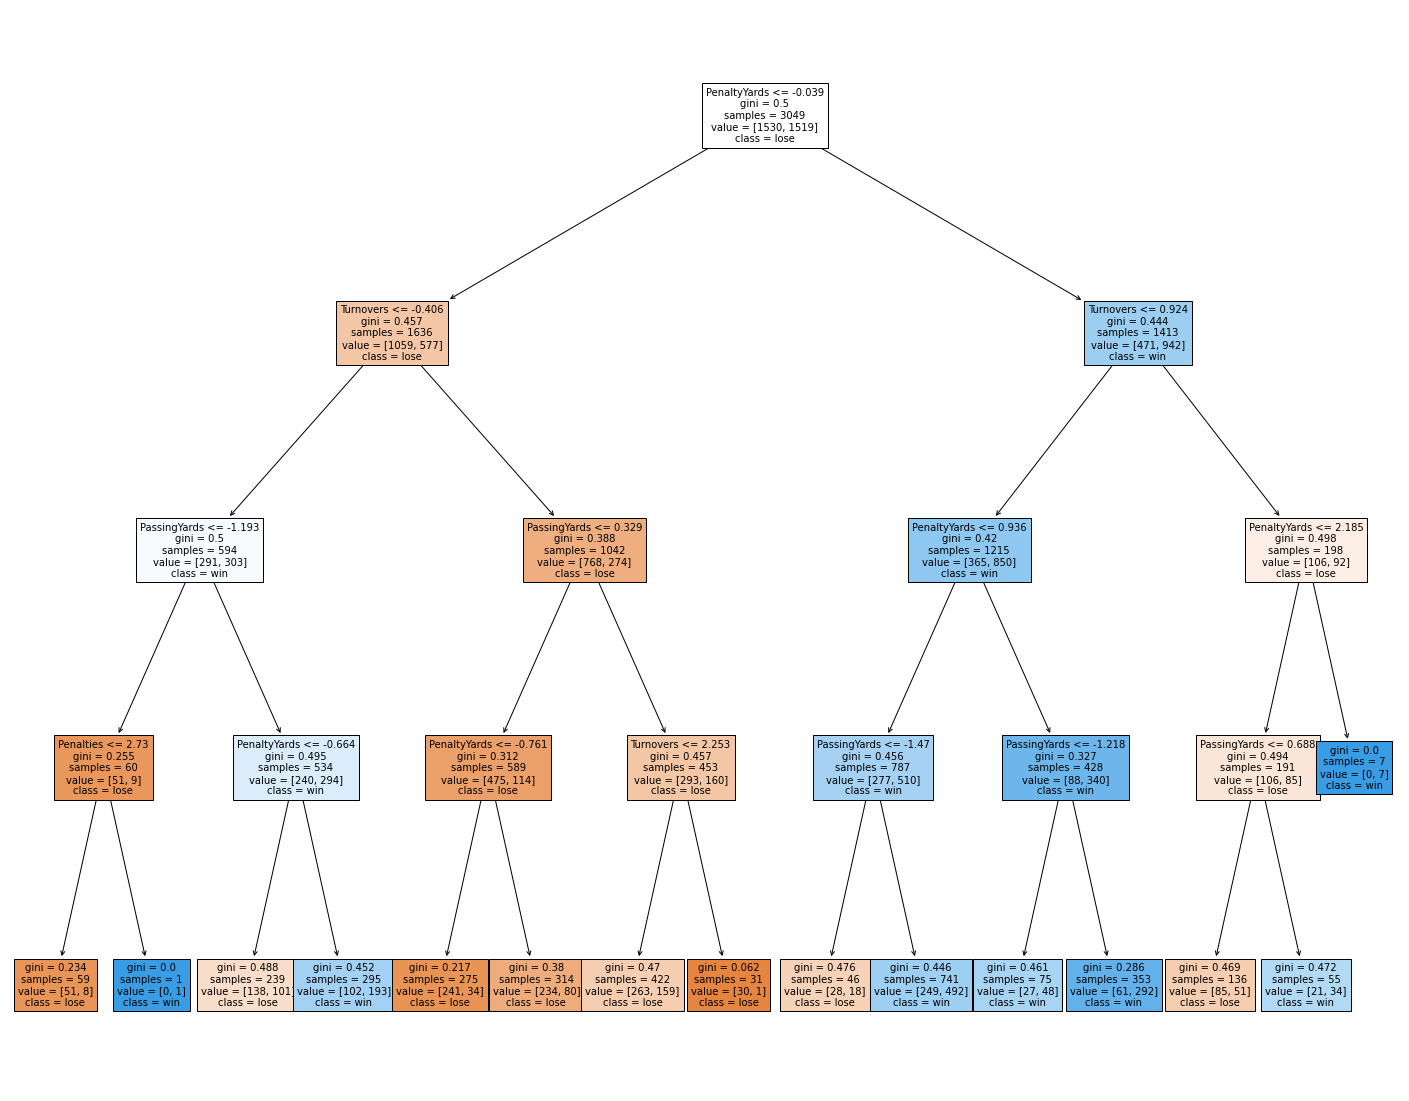

In [ ]:
d22 = Decision_tree(x_train, y_train, x_test, y_test, df.columns[[4,6,7,8]])

PCA

In [ ]:
X = StandardScaler().fit_transform(df.loc[:,'PassingYards':'Turnovers'].values)
y = df.loc[:,'Win_Lose']

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, y], axis = 1)

In [ ]:
finalDf

principal component 1  principal component 2  Win_Lose
0                 -0.257212              -2.090933         1
1                  0.151786              -0.128507         0
2                 -0.013904               0.923700         1
3                  0.769783               0.004566         0
4                 -1.199782               0.169989         1
...                     ...                    ...       ...
3807              -0.039357               1.725680         0
3808               0.319616               0.596899         1
3809               1.107611              -1.058615         0
3810               1.603287              -1.236806         1
3811               0.330779               0.242510         0

[3812 rows x 3 columns]

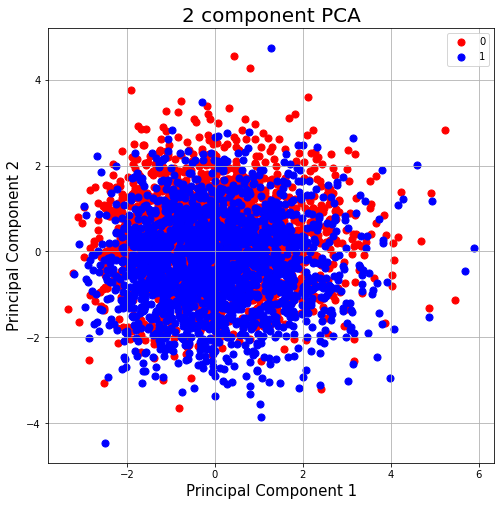

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Win_Lose'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

array([0.37825074, 0.26195997])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(finalDf.loc[:,['principal component 1','principal component 2']],finalDf.loc[:,'Win_Lose'],test_size=0.2, random_state=420)

Accuracy: 0.6068152031454783
[[236 140]
 [160 227]]
              precision    recall  f1-score   support

           0       0.60      0.63      0.61       376
           1       0.62      0.59      0.60       387

    accuracy                           0.61       763
   macro avg       0.61      0.61      0.61       763
weighted avg       0.61      0.61      0.61       763



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


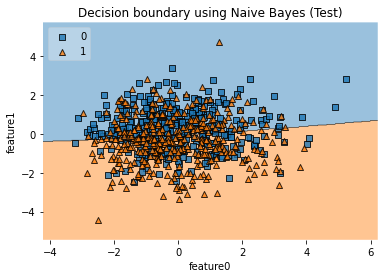

In [ ]:
p_pca = Naive_bayes(x_train.values, y_train, x_test.values, y_test)

Accuracy: 0.601572739187418
[[264 112]
 [192 195]]
              precision    recall  f1-score   support

           0       0.58      0.70      0.63       376
           1       0.64      0.50      0.56       387

    accuracy                           0.60       763
   macro avg       0.61      0.60      0.60       763
weighted avg       0.61      0.60      0.60       763



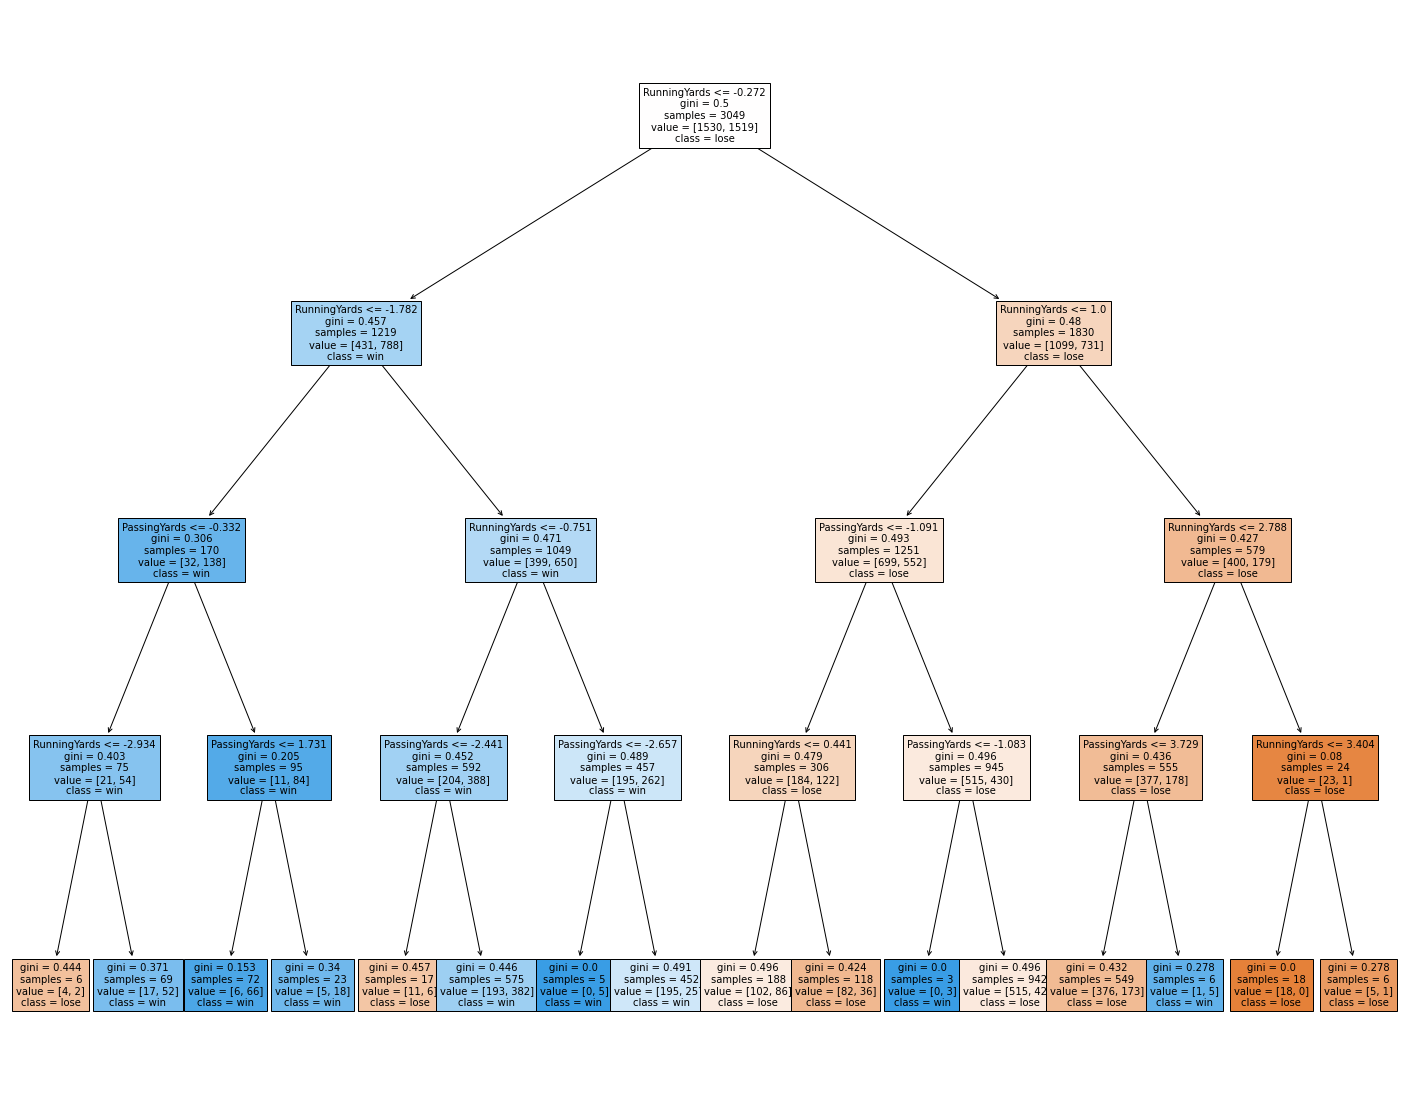

In [ ]:
d_pca = Decision_tree(x_train, y_train, x_test, y_test, df.columns[4:-1])

#Accuracy scores  
features|Naive Bayes|Decision Trees  
--------|-----------|-------------  
All 5|0.6998689384010485|**0.6893840104849279**  
PassingYards, RunningYards|0.6841415465268676|0.6526867627785059  
PassingYards, PenaltyYards|0.5294888597640891|0.5137614678899083  
PassingYards, Penalties|0.5307994757536042|0.5111402359108781  
PassingYards, Turnovers|0.6055045871559633|0.6055045871559633  
RunningYards, PenaltyYards|0.6566186107470511|0.6500655307994757  
RunningYards, Penalties|0.6592398427260813|0.653997378768021  
RunningYards, Turnovers|0.6841415465268676|0.6697247706422018  
PenaltyYards, Penalties|0.5019659239842726|0.4927916120576671  
PenaltyYards, Turnovers|0.5937090432503277| 0.6146788990825688  
Penalties, Turnovers|0.601572739187418|0.6081258191349934  
PassingYards, RunningYards, PenaltyYards|0.6854521625163827|0.6513761467889908  
RunningYards, PenaltyYards, Penalties|0.6513761467889908|0.6500655307994757  
PenaltyYards, Penalties, Turnovers|0.6068152031454783|0.6094364351245085 
PassingYards, PenaltyYards, Penalties|0.5203145478374837|0.5111402359108781  
PassingYards, Penalties, Turnovers|0.6107470511140236|0.6002621231979031  
RunningYards, Penalties, Turnovers|0.6697247706422018|0.6684141546526867  
PassingYards, RunningYards, PenaltyYards, Penalties|0.6736566186107471|0.6513761467889908  
RunningYards, PenaltyYards, Penalties, Turnovers|0.6775884665792923|0.6684141546526867  
PassingYards, PenaltyYards, Penalties, Turnovers|0.6094364351245085|0.6081258191349934  
PassingYards, RunningYards, Penalties, Turnovers|0.7011795543905636|**0.6893840104849279**  
PassingYards, RunningYards, PenaltyYards, Turnovers|**0.7116644823066841**|**0.6893840104849279**  
PCA|0.6068152031454783|0.601572739187418